# P3 : Anticipez les besoins en consommation de bâtiments

## Contexte : 
Vous travaillez pour la ville de Seattle. Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, votre équipe s’intéresse de près à la consommation et aux émissions des bâtiments non destinés à l’habitation.
Des relevés minutieux ont été effectués par les agents de la ville en 2016. Voici les données et leur source. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, vous voulez tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l’habitation pour lesquels elles n’ont pas encore été mesurées.
Vous cherchez également à évaluer l’intérêt de l’"ENERGY STAR Score" pour la prédiction d’émissions (expliqué sur ce site en anglais : www.energystar.gov), qui est fastidieux à calculer avec l’approche utilisée actuellement par votre équipe. Vous l'intégrerez dans la modélisation et jugerez de son intérêt.
## Mission : :

Réaliser une courte analyse exploratoire.
Tester différents modèles de prédiction afin de répondre au mieux à la problématique.

## Etape 1: Analyse exploratoire des datasets et 1er feature engineering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import missingno as msno 

### 1.1 Chargement et exploration initiale des données

In [2]:
# Charger et afficher les données
df = pd.read_csv('2016_Building_Energy_Benchmarking.csv')
df

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57


In [3]:
# Taille du dataframe
df.shape

(3376, 46)

In [4]:
# Aperçu des données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [5]:
# Vérifier les données manquantes

# Calculer le nombre de valeurs manquantes pour chaque colonne
nb_valeurs_manquantes = df.isnull().sum()

# Calculer le pourcentage de valeurs manquantes pour chaque colonne
pourcentage_valeurs_manquantes = (nb_valeurs_manquantes / len(df)) * 100

# Créer un DataFrame pour afficher les résultats
resultats_manquants = pd.DataFrame({'Nombre de valeurs manquantes': nb_valeurs_manquantes, 'Pourcentage de valeurs manquantes': pourcentage_valeurs_manquantes})

# Afficher les résultats
print(resultats_manquants)

                                 Nombre de valeurs manquantes  \
OSEBuildingID                                               0   
DataYear                                                    0   
BuildingType                                                0   
PrimaryPropertyType                                         0   
PropertyName                                                0   
Address                                                     0   
City                                                        0   
State                                                       0   
ZipCode                                                    16   
TaxParcelIdentificationNumber                               0   
CouncilDistrictCode                                         0   
Neighborhood                                                0   
Latitude                                                    0   
Longitude                                                   0   
YearBuilt                

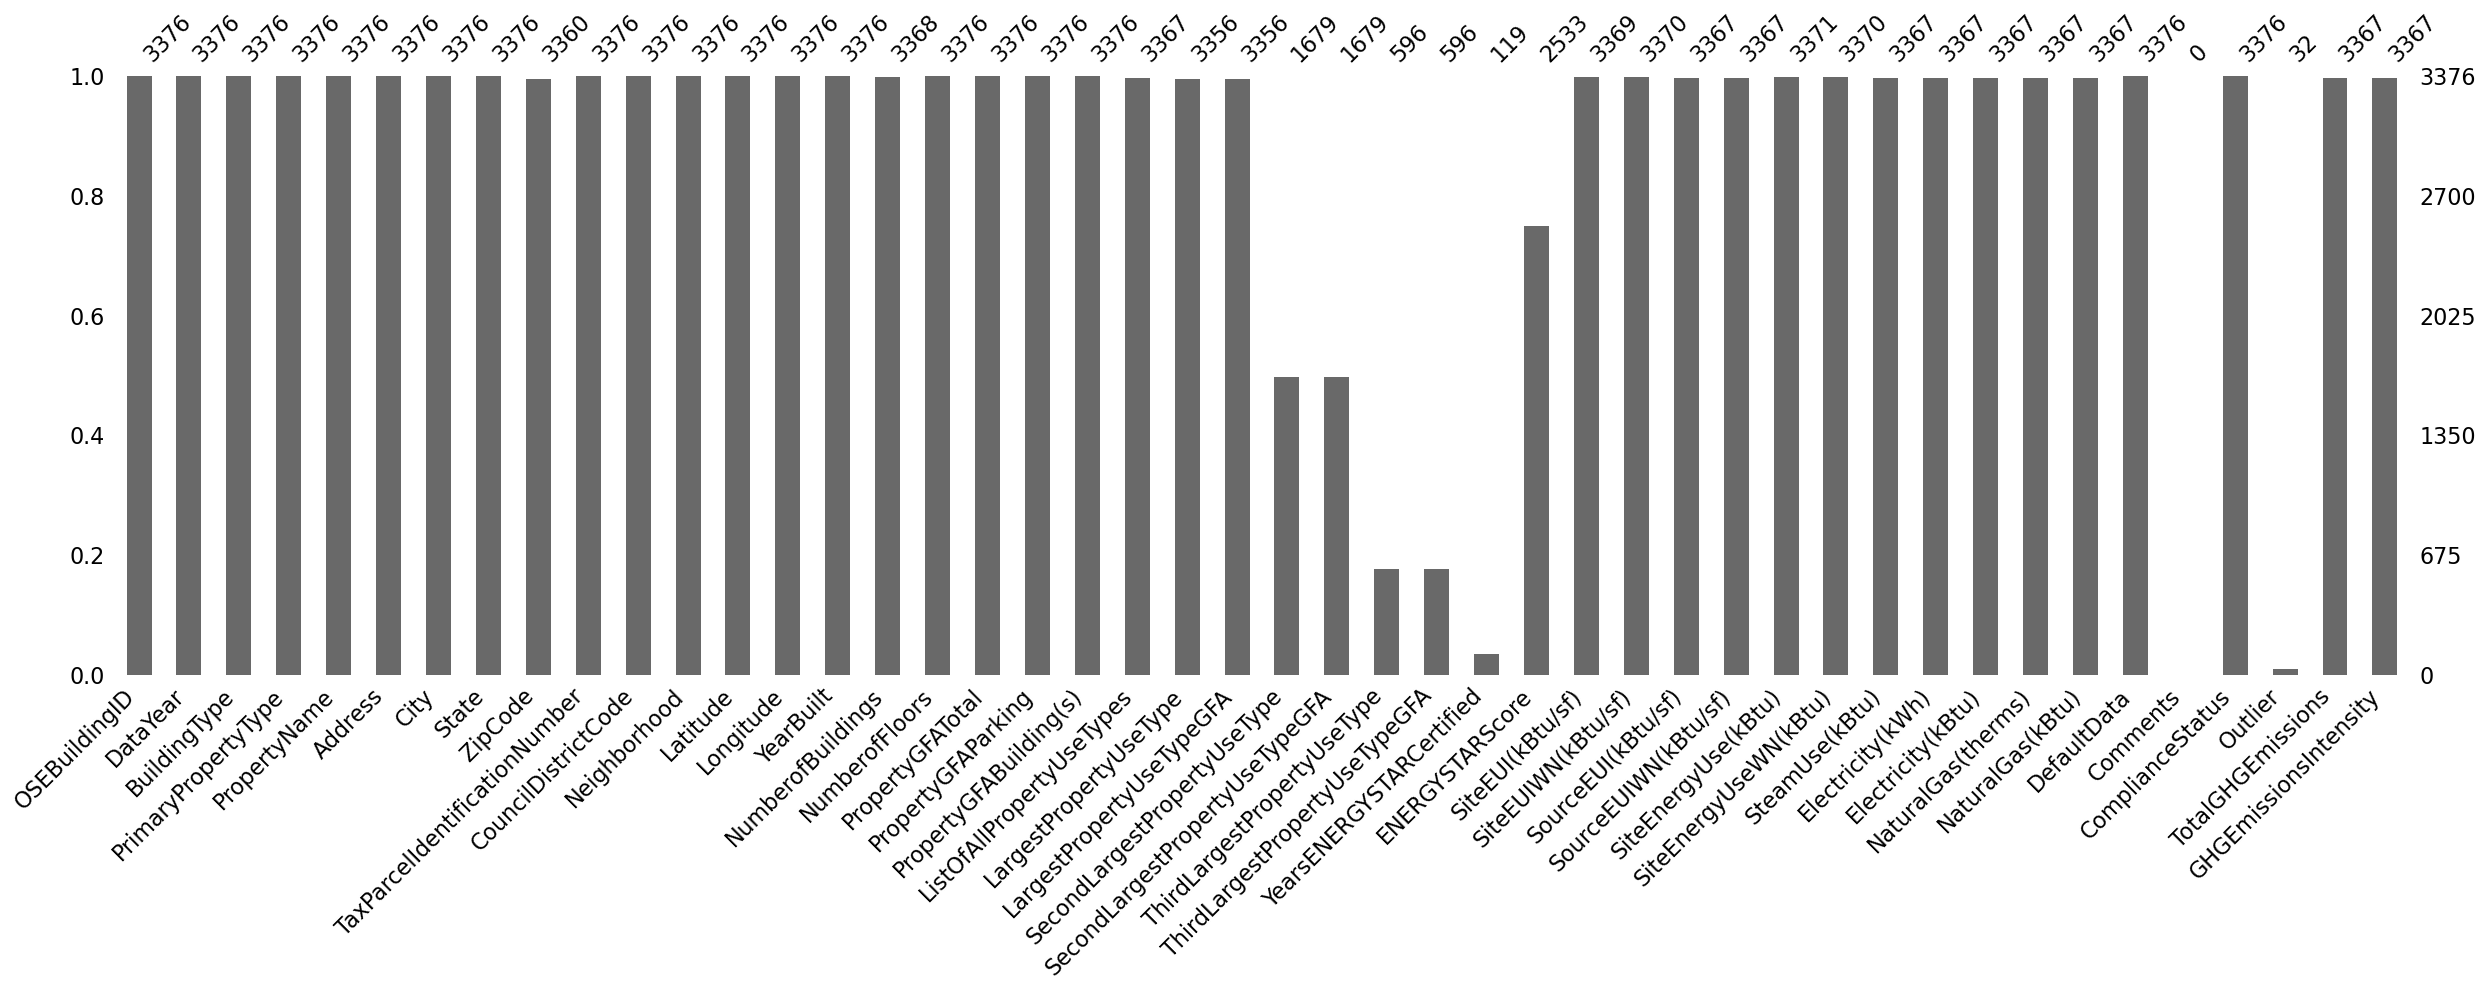

In [6]:
# Visualiser les valeurs manquantes sous forme de graphique à barres
msno.bar(df) 

# Enregistrer le graphe
plt.tight_layout()
plt.savefig("graphique_msno.png")

In [7]:
# Vérifier les valeurs dupliquées
df.duplicated().sum()

0

### 1.2 Analyse descriptive, nettoyage et visualisation des données

In [8]:
# Statistiques descriptives
df.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,...,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,...,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,...,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,...,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,...,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,...,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [9]:
# Liste des features
features = df.columns.tolist()
features

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Address',
 'City',
 'State',
 'ZipCode',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'DefaultData',
 'Comments',
 'ComplianceStatus',
 'Outlier',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

In [10]:
# Supprimer la colonne nulle 'Comments'
data = df.drop(columns=['Comments'])
data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,Compliant,NaN,22.11,1.57


In [11]:
# Supprimer les colonnes possédant une valeur unique
valeur_unique = data.nunique()

# Filtrer les colonnes avec une seule valeur unique
colonnes_avec_valeur_unique = valeur_unique[valeur_unique == 1].index.tolist()

# Afficher les noms des colonnes avec leur valeur unique
for column in colonnes_avec_valeur_unique:
    valeur_unique = df[column].unique()[0]
    print(f"Colonne : {column}, Valeur unique : {valeur_unique}")

Colonne : DataYear, Valeur unique : 2016
Colonne : City, Valeur unique : Seattle
Colonne : State, Valeur unique : WA


On va supprimer ces colonnes avec une valeur unique, car ils ne sont pas intéressantes pour faire une régression ou une classification.


In [12]:
print("Nombre de colonnes avant la suppression :", data.shape[1])
data0 = data.drop(columns=colonnes_avec_valeur_unique)
print("Nombre de colonnes après la suppression :", data.shape[1])

Nombre de colonnes avant la suppression : 45
Nombre de colonnes après la suppression : 45


In [13]:
# Récupération des bâtiments non destinés à l'habitation
# Afficher les types uniques présents dans la colonne 'BuildingType' :
building_types = data0['BuildingType'].unique()
building_types

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [14]:
# Filtrer le dataframe pour isoler les types bâtiments non destinés à l’habitation
# Liste des types non résidentiels
non_residential_types = [
    'NonResidential',
    'Nonresidential COS',
    'SPS-District K-12',
    'Campus',
    'Nonresidential WA'
]

# Filtrer le dataframe pour les types non résidentiels
data1 = data0[data0['BuildingType'].isin(non_residential_types)]

# Afficher les résultats
data1

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,...,SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,NonResidential,Hotel,Mayflower park hotel,405 Olive way,98101.0,0659000030,7,DOWNTOWN,47.61220,...,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,Compliant,NaN,249.98,2.83
1,2,NonResidential,Hotel,Paramount Hotel,724 Pine street,98101.0,0659000220,7,DOWNTOWN,47.61317,...,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,Compliant,NaN,295.86,2.86
2,3,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,98101.0,0659000475,7,DOWNTOWN,47.61393,...,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,Compliant,NaN,2089.28,2.19
3,5,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,98101.0,0659000640,7,DOWNTOWN,47.61412,...,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,Compliant,NaN,286.43,4.67
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,98121.0,0659000970,7,DOWNTOWN,47.61375,...,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,NaN,1624049080,2,GREATER DUWAMISH,47.56722,...,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,NaN,3558300000,2,DOWNTOWN,47.59625,...,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,Compliant,NaN,32.17,2.01
3373,50224,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,...,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,Compliant,NaN,223.54,16.99
3374,50225,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,NaN,7883603155,1,GREATER DUWAMISH,47.52832,...,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,Compliant,NaN,22.11,1.57


In [15]:
# Supprimer les lignes ne possédant pas de valeurs pour la variable 'ENERGYSTARScore'
data2 = data1.dropna(subset=['ENERGYSTARScore'])
data2

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,...,SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,NonResidential,Hotel,Mayflower park hotel,405 Olive way,98101.0,0659000030,7,DOWNTOWN,47.61220,...,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,Compliant,NaN,249.98,2.83
1,2,NonResidential,Hotel,Paramount Hotel,724 Pine street,98101.0,0659000220,7,DOWNTOWN,47.61317,...,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,Compliant,NaN,295.86,2.86
2,3,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,98101.0,0659000475,7,DOWNTOWN,47.61393,...,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,Compliant,NaN,2089.28,2.19
3,5,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,98101.0,0659000640,7,DOWNTOWN,47.61412,...,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,Compliant,NaN,286.43,4.67
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,98121.0,0659000970,7,DOWNTOWN,47.61375,...,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3339,50069,NonResidential,Small- and Mid-Sized Office,Airport - Main Terminal,7277 Perimeter Rd.,98108.0,2824049007,2,GREATER DUWAMISH,47.53161,...,0.00,6.351199e+05,2.167029e+06,22536.210940,2.253621e+06,False,Compliant,NaN,134.80,5.39
3347,50081,NonResidential,K-12 School,Hamlin Robinson School,1701 20th Ave South,98144.0,7548300840,3,GREATER DUWAMISH,47.58831,...,0.00,3.886204e+05,1.325973e+06,0.000000,0.000000e+00,False,Compliant,NaN,9.24,0.21
3366,50210,Nonresidential COS,Office,Central West HQ / Brown Bear,1403 w howe,NaN,2425039137,7,MAGNOLIA / QUEEN ANNE,47.63572,...,0.00,1.473235e+05,5.026678e+05,0.000000,0.000000e+00,True,Error - Correct Default Data,NaN,3.50,0.26
3369,50220,Nonresidential COS,Office,Genesee/SC SE HQ,4420 S Genesee,NaN,4154300585,2,SOUTHEAST,47.56440,...,0.00,8.134140e+04,2.775369e+05,1102.729980,1.102730e+05,True,Error - Correct Default Data,NaN,7.79,0.51


In [16]:
data2['ENERGYSTARScore'].unique

<bound method Series.unique of 0       60.0
1       61.0
2       43.0
3       56.0
4       75.0
        ... 
3339     9.0
3347    77.0
3366    75.0
3369    93.0
3371    46.0
Name: ENERGYSTARScore, Length: 1094, dtype: float64>

In [17]:
# Supprimer les lignes ne possédant pas de valeurs pour les variables cibles 'TotalGHGEmissions' et 'SiteEnergyUse(kBtu)'  :
data3 = data2.dropna(subset=['TotalGHGEmissions', 'SiteEnergyUse(kBtu)'])
data3

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,...,SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,NonResidential,Hotel,Mayflower park hotel,405 Olive way,98101.0,0659000030,7,DOWNTOWN,47.61220,...,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,Compliant,NaN,249.98,2.83
1,2,NonResidential,Hotel,Paramount Hotel,724 Pine street,98101.0,0659000220,7,DOWNTOWN,47.61317,...,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,Compliant,NaN,295.86,2.86
2,3,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,98101.0,0659000475,7,DOWNTOWN,47.61393,...,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,Compliant,NaN,2089.28,2.19
3,5,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,98101.0,0659000640,7,DOWNTOWN,47.61412,...,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,Compliant,NaN,286.43,4.67
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,98121.0,0659000970,7,DOWNTOWN,47.61375,...,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3339,50069,NonResidential,Small- and Mid-Sized Office,Airport - Main Terminal,7277 Perimeter Rd.,98108.0,2824049007,2,GREATER DUWAMISH,47.53161,...,0.00,6.351199e+05,2.167029e+06,22536.210940,2.253621e+06,False,Compliant,NaN,134.80,5.39
3347,50081,NonResidential,K-12 School,Hamlin Robinson School,1701 20th Ave South,98144.0,7548300840,3,GREATER DUWAMISH,47.58831,...,0.00,3.886204e+05,1.325973e+06,0.000000,0.000000e+00,False,Compliant,NaN,9.24,0.21
3366,50210,Nonresidential COS,Office,Central West HQ / Brown Bear,1403 w howe,NaN,2425039137,7,MAGNOLIA / QUEEN ANNE,47.63572,...,0.00,1.473235e+05,5.026678e+05,0.000000,0.000000e+00,True,Error - Correct Default Data,NaN,3.50,0.26
3369,50220,Nonresidential COS,Office,Genesee/SC SE HQ,4420 S Genesee,NaN,4154300585,2,SOUTHEAST,47.56440,...,0.00,8.134140e+04,2.775369e+05,1102.729980,1.102730e+05,True,Error - Correct Default Data,NaN,7.79,0.51


In [18]:
# Supprimer les colonnes 'PropertyName', 'OSEBuildingID' et 'TaxParcelIdentificationNumber' car elles n'influencent en rien la consommation d'un batiment en C02
data4 = data3.drop(columns=['PropertyName', 'OSEBuildingID', 'TaxParcelIdentificationNumber'])
data4

,BuildingType,PrimaryPropertyType,Address,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,...,SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,NonResidential,Hotel,405 Olive way,98101.0,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,...,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,Compliant,NaN,249.98,2.83
1,NonResidential,Hotel,724 Pine street,98101.0,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,...,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,Compliant,NaN,295.86,2.86
2,NonResidential,Hotel,1900 5th Avenue,98101.0,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,...,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,Compliant,NaN,2089.28,2.19
3,NonResidential,Hotel,620 STEWART ST,98101.0,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,...,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,Compliant,NaN,286.43,4.67
4,NonResidential,Hotel,401 LENORA ST,98121.0,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,...,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3339,NonResidential,Small- and Mid-Sized Office,7277 Perimeter Rd.,98108.0,2,GREATER DUWAMISH,47.53161,-122.29944,1929,1.0,...,0.00,6.351199e+05,2.167029e+06,22536.210940,2.253621e+06,False,Compliant,NaN,134.80,5.39
3347,NonResidential,K-12 School,1701 20th Ave South,98144.0,3,GREATER DUWAMISH,47.58831,-122.30650,2015,1.0,...,0.00,3.886204e+05,1.325973e+06,0.000000,0.000000e+00,False,Compliant,NaN,9.24,0.21
3366,Nonresidential COS,Office,1403 w howe,NaN,7,MAGNOLIA / QUEEN ANNE,47.63572,-122.37525,1952,1.0,...,0.00,1.473235e+05,5.026678e+05,0.000000,0.000000e+00,True,Error - Correct Default Data,NaN,3.50,0.26
3369,Nonresidential COS,Office,4420 S Genesee,NaN,2,SOUTHEAST,47.56440,-122.27813,1960,1.0,...,0.00,8.134140e+04,2.775369e+05,1102.729980,1.102730e+05,True,Error - Correct Default Data,NaN,7.79,0.51


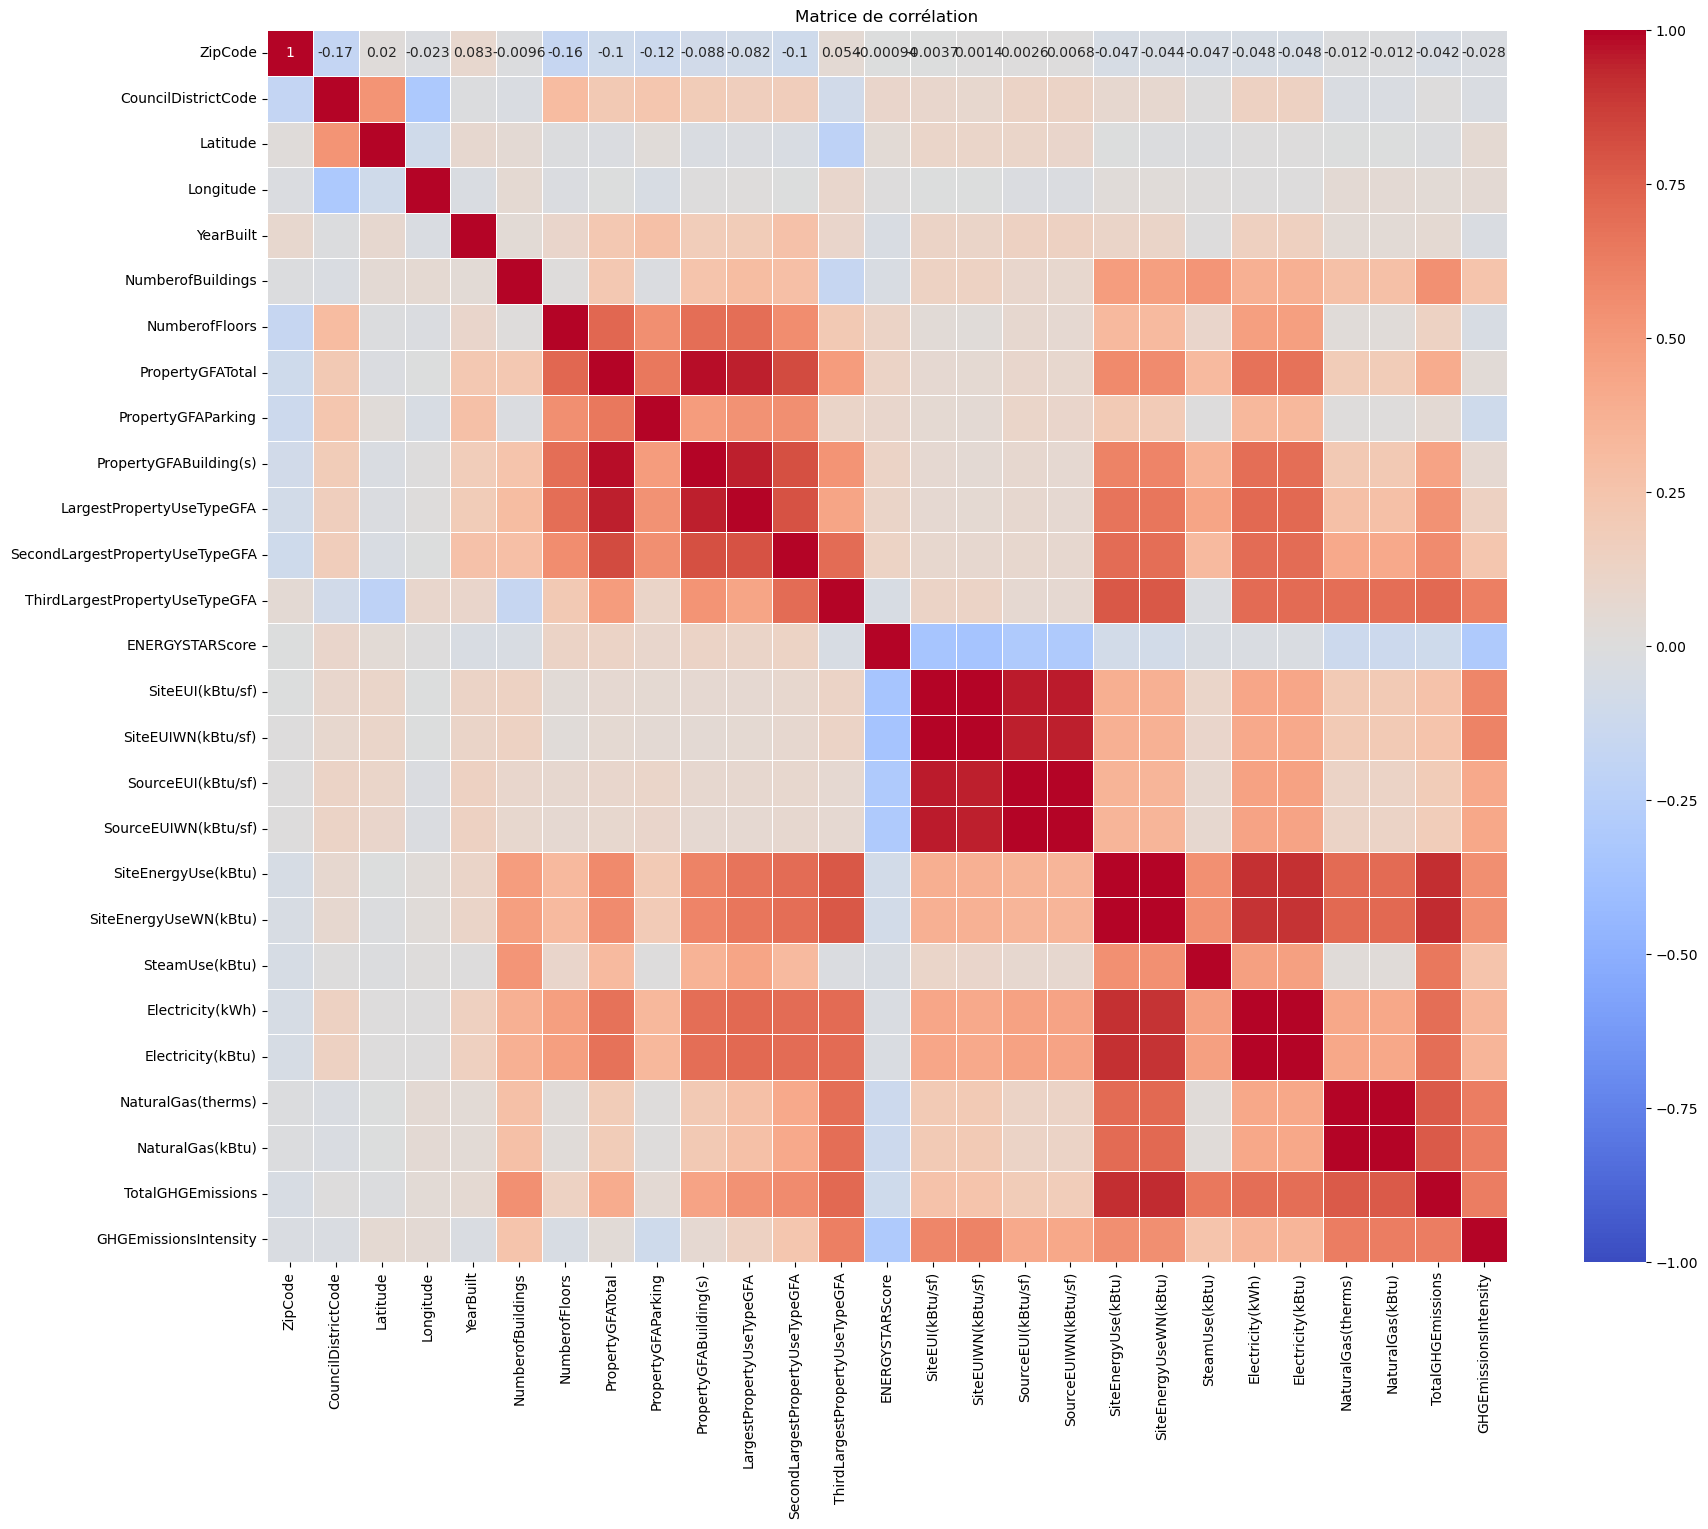

In [19]:
# Visualiser les corrélations entre les variables à l’aide d’une heatmap.

# Sélectionner uniquement les colonnes numériques

numerical_data = data4.select_dtypes(include=[np.number])

# Calculer la matrice de corrélation
correlation_matrix = numerical_data.corr()

# Visualiser la matrice de corrélation
plt.figure(figsize=(20, 16))
sns.heatmap(numerical_data.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de corrélation')
plt.show()

In [20]:
# Supprimer les types propriétés 'PrimaryPropertyType' et 'ListOfAllPropertyUseTypes' car ils sont remplacés par ('LargestPropertyUseType', 'SecondLargestPropertyUseType' et 'ThirdLargestPropertyUseType')
data5 = data4.drop(columns=['PrimaryPropertyType', 'ListOfAllPropertyUseTypes'])
data5

,BuildingType,Address,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,...,SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,NonResidential,405 Olive way,98101.0,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,...,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,Compliant,NaN,249.98,2.83
1,NonResidential,724 Pine street,98101.0,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,...,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,Compliant,NaN,295.86,2.86
2,NonResidential,1900 5th Avenue,98101.0,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,...,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,Compliant,NaN,2089.28,2.19
3,NonResidential,620 STEWART ST,98101.0,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,...,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,Compliant,NaN,286.43,4.67
4,NonResidential,401 LENORA ST,98121.0,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,...,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3339,NonResidential,7277 Perimeter Rd.,98108.0,2,GREATER DUWAMISH,47.53161,-122.29944,1929,1.0,2,...,0.00,6.351199e+05,2.167029e+06,22536.210940,2.253621e+06,False,Compliant,NaN,134.80,5.39
3347,NonResidential,1701 20th Ave South,98144.0,3,GREATER DUWAMISH,47.58831,-122.30650,2015,1.0,3,...,0.00,3.886204e+05,1.325973e+06,0.000000,0.000000e+00,False,Compliant,NaN,9.24,0.21
3366,Nonresidential COS,1403 w howe,NaN,7,MAGNOLIA / QUEEN ANNE,47.63572,-122.37525,1952,1.0,1,...,0.00,1.473235e+05,5.026678e+05,0.000000,0.000000e+00,True,Error - Correct Default Data,NaN,3.50,0.26
3369,Nonresidential COS,4420 S Genesee,NaN,2,SOUTHEAST,47.56440,-122.27813,1960,1.0,1,...,0.00,8.134140e+04,2.775369e+05,1102.729980,1.102730e+05,True,Error - Correct Default Data,NaN,7.79,0.51


In [21]:
# Supression des variables métriques géométriques inutiles pour l'analyse
# "Address", "ZipCode" et "CouncilDistrictCode" sont inutiles, car La Latitude et la Longitude sont les métriques les plus précises pour situer un bâtiment.
data6 = data5.drop(columns=['Address', 'ZipCode', 'CouncilDistrictCode'])
data6

,BuildingType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,NonResidential,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,...,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,Compliant,NaN,249.98,2.83
1,NonResidential,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,...,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,Compliant,NaN,295.86,2.86
2,NonResidential,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,...,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,Compliant,NaN,2089.28,2.19
3,NonResidential,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,...,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,Compliant,NaN,286.43,4.67
4,NonResidential,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,...,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3339,NonResidential,GREATER DUWAMISH,47.53161,-122.29944,1929,1.0,2,24990,0,24990,...,0.00,6.351199e+05,2.167029e+06,22536.210940,2.253621e+06,False,Compliant,NaN,134.80,5.39
3347,NonResidential,GREATER DUWAMISH,47.58831,-122.30650,2015,1.0,3,45000,0,45000,...,0.00,3.886204e+05,1.325973e+06,0.000000,0.000000e+00,False,Compliant,NaN,9.24,0.21
3366,Nonresidential COS,MAGNOLIA / QUEEN ANNE,47.63572,-122.37525,1952,1.0,1,13661,0,13661,...,0.00,1.473235e+05,5.026678e+05,0.000000,0.000000e+00,True,Error - Correct Default Data,NaN,3.50,0.26
3369,Nonresidential COS,SOUTHEAST,47.56440,-122.27813,1960,1.0,1,15398,0,15398,...,0.00,8.134140e+04,2.775369e+05,1102.729980,1.102730e+05,True,Error - Correct Default Data,NaN,7.79,0.51


In [22]:
# Supprimer les lignes avec des valeurs par défaut (ou artificielles), qu'on peut les détecter avec la colonne 'DefaultData' qui donne comme valeur True ou False
data7 = data6.drop(data6[data6['DefaultData'] == True].index)
data7

,BuildingType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,NonResidential,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,...,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,Compliant,NaN,249.98,2.83
1,NonResidential,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,...,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,Compliant,NaN,295.86,2.86
2,NonResidential,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,...,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,Compliant,NaN,2089.28,2.19
3,NonResidential,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,...,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,Compliant,NaN,286.43,4.67
4,NonResidential,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,...,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,Nonresidential COS,LAKE UNION,47.62251,-122.33390,2014,1.0,13,536697,197659,339038,...,0.00,2.909076e+06,9925769.0,33132.78906,3313279.0,False,Compliant,NaN,245.16,0.46
3337,NonResidential,LAKE UNION,47.65476,-122.34732,2014,1.0,4,126823,41539,85284,...,0.00,1.206219e+06,4115620.0,19267.79102,1926779.0,False,Compliant,NaN,131.02,1.03
3338,NonResidential,GREATER DUWAMISH,47.54425,-122.31776,1955,1.0,1,52085,4222,47863,...,0.00,2.147724e+05,732803.0,28730.51953,2873052.0,False,Compliant,NaN,157.70,3.03
3339,NonResidential,GREATER DUWAMISH,47.53161,-122.29944,1929,1.0,2,24990,0,24990,...,0.00,6.351199e+05,2167029.0,22536.21094,2253621.0,False,Compliant,NaN,134.80,5.39


In [23]:
default_data = data7['DefaultData'].unique()
default_data

array([False])

In [24]:
# Supprimer la colonne 'DefaultData' qui devient unique après suppression des valeurs par défaut
data8 = data7.drop('DefaultData', axis=1)
data8

,BuildingType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,NonResidential,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,...,7.456910e+06,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,Compliant,NaN,249.98,2.83
1,NonResidential,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,...,8.664479e+06,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,Compliant,NaN,295.86,2.86
2,NonResidential,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,...,7.393711e+07,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,Compliant,NaN,2089.28,2.19
3,NonResidential,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,...,6.946800e+06,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,Compliant,NaN,286.43,4.67
4,NonResidential,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,...,1.465650e+07,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,Nonresidential COS,LAKE UNION,47.62251,-122.33390,2014,1.0,13,536697,197659,339038,...,1.403717e+07,0.00,2.909076e+06,9925769.0,33132.78906,3313279.0,Compliant,NaN,245.16,0.46
3337,NonResidential,LAKE UNION,47.65476,-122.34732,2014,1.0,4,126823,41539,85284,...,6.042400e+06,0.00,1.206219e+06,4115620.0,19267.79102,1926779.0,Compliant,NaN,131.02,1.03
3338,NonResidential,GREATER DUWAMISH,47.54425,-122.31776,1955,1.0,1,52085,4222,47863,...,4.182622e+06,0.00,2.147724e+05,732803.0,28730.51953,2873052.0,Compliant,NaN,157.70,3.03
3339,NonResidential,GREATER DUWAMISH,47.53161,-122.29944,1929,1.0,2,24990,0,24990,...,4.731814e+06,0.00,6.351199e+05,2167029.0,22536.21094,2253621.0,Compliant,NaN,134.80,5.39


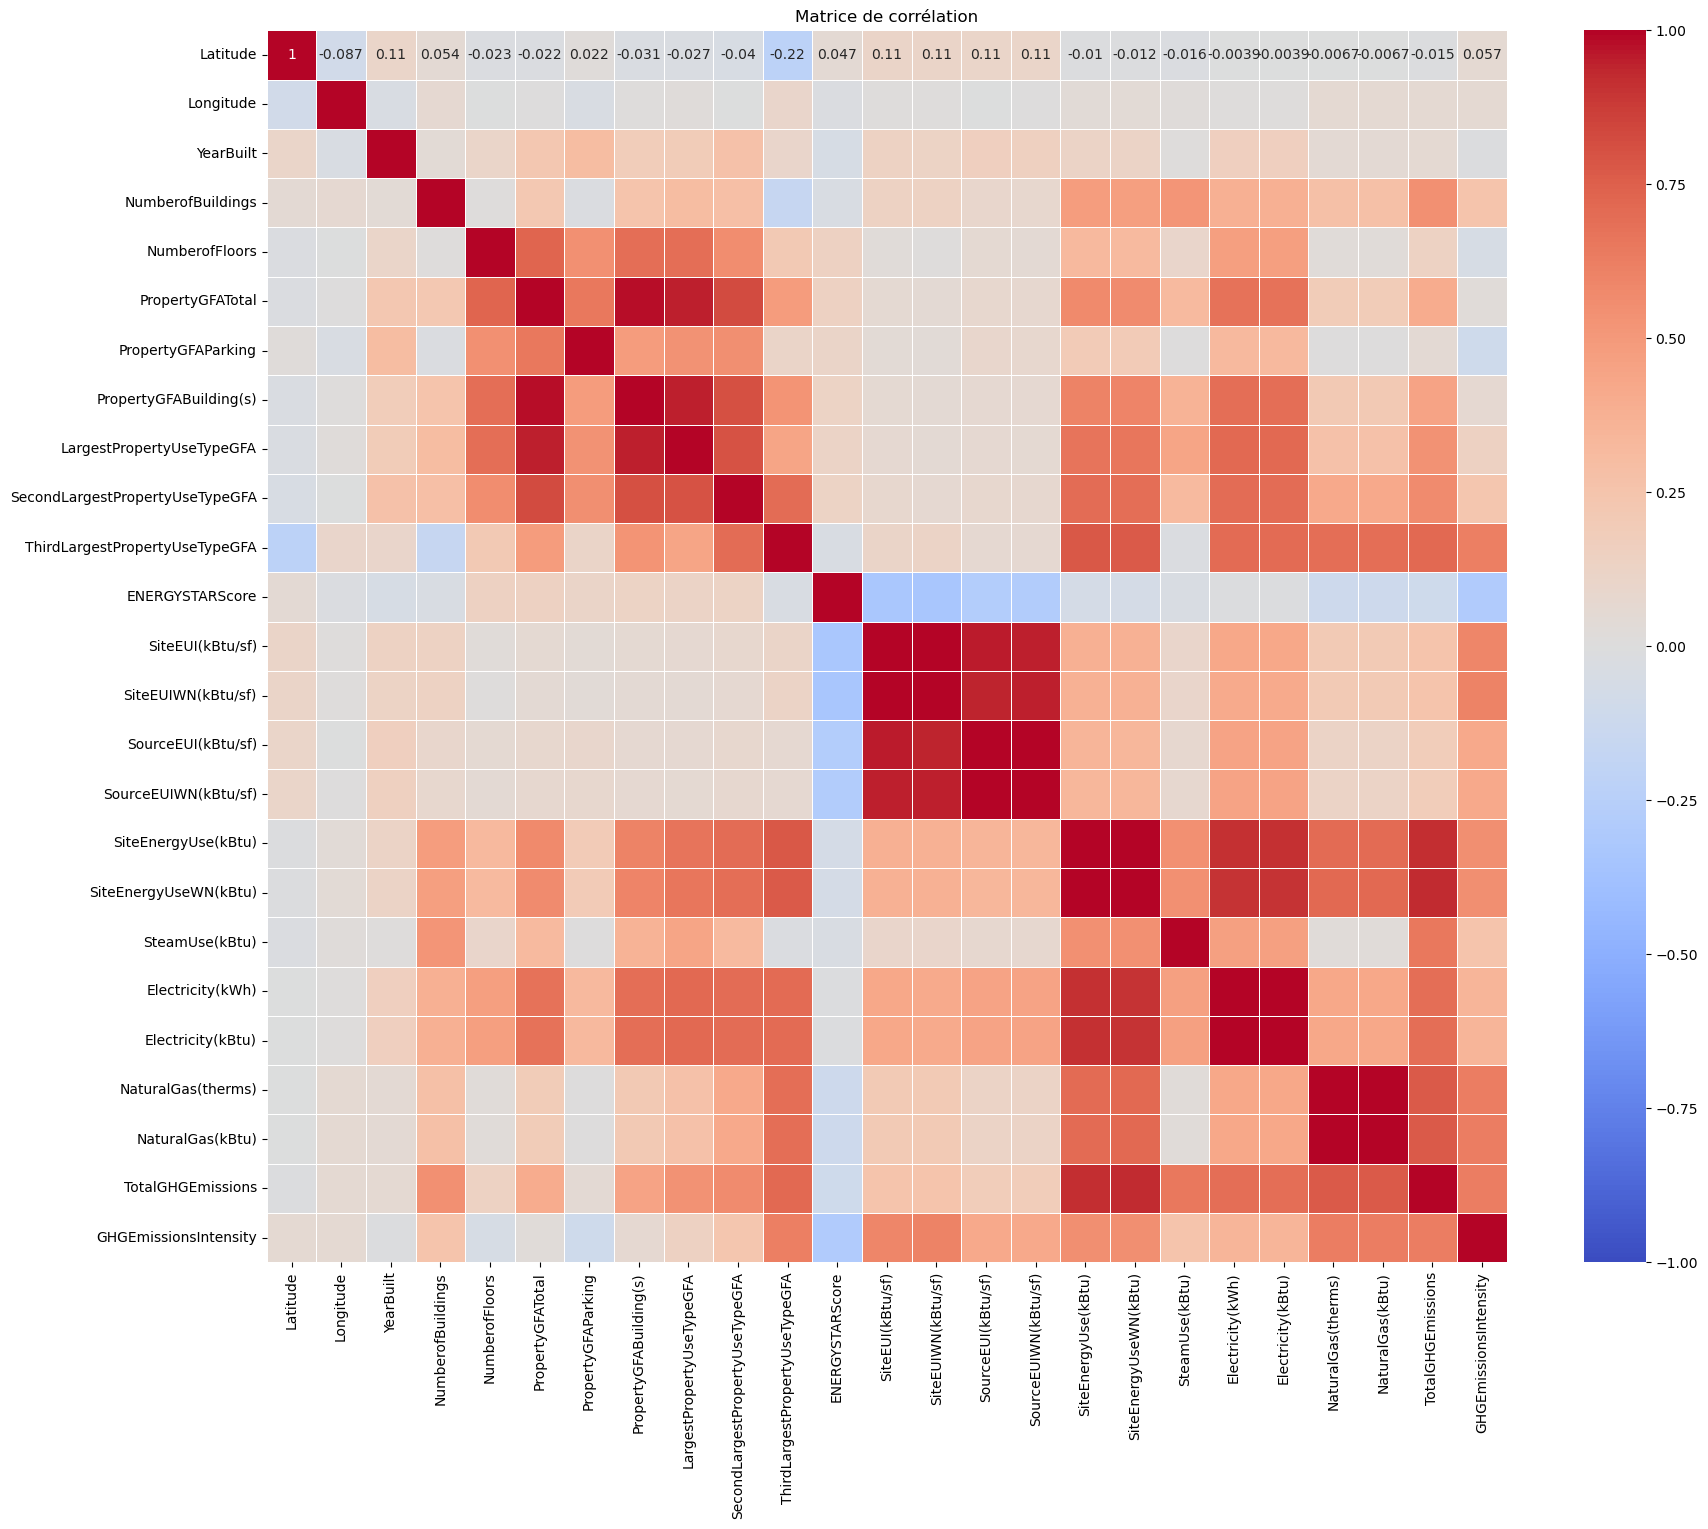

In [25]:
# Visualiser les corrélations entre les variables à l’aide d’une heatmap.

# Sélectionner uniquement les colonnes numériques

numerical_data = data8.select_dtypes(include=[np.number])

# Calculer la matrice de corrélation
correlation_matrix = numerical_data.corr()

# Visualiser la matrice de corrélation
plt.figure(figsize=(20, 16))
sns.heatmap(numerical_data.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de corrélation')
plt.show()

In [26]:
# Supprimer la colonne redondante 'NaturalGas(therms)' et garder NaturalGas(kBtu)
data9 = data8.drop(columns=['NaturalGas(therms)'])
data9

,BuildingType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,NonResidential,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,...,7226362.50,7.456910e+06,2003882.00,1.156514e+06,3946027.0,1276453.0,Compliant,NaN,249.98,2.83
1,NonResidential,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,...,8387933.00,8.664479e+06,0.00,9.504252e+05,3242851.0,5145082.0,Compliant,NaN,295.86,2.86
2,NonResidential,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,...,72587024.00,7.393711e+07,21566554.00,1.451544e+07,49526664.0,1493800.0,Compliant,NaN,2089.28,2.19
3,NonResidential,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,...,6794584.00,6.946800e+06,2214446.25,8.115253e+05,2768924.0,1811213.0,Compliant,NaN,286.43,4.67
4,NonResidential,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,...,14172606.00,1.465650e+07,0.00,1.573449e+06,5368607.0,8803998.0,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,Nonresidential COS,LAKE UNION,47.62251,-122.33390,2014,1.0,13,536697,197659,339038,...,13239050.00,1.403717e+07,0.00,2.909076e+06,9925769.0,3313279.0,Compliant,NaN,245.16,0.46
3337,NonResidential,LAKE UNION,47.65476,-122.34732,2014,1.0,4,126823,41539,85284,...,6042399.50,6.042400e+06,0.00,1.206219e+06,4115620.0,1926779.0,Compliant,NaN,131.02,1.03
3338,NonResidential,GREATER DUWAMISH,47.54425,-122.31776,1955,1.0,1,52085,4222,47863,...,3605855.50,4.182622e+06,0.00,2.147724e+05,732803.0,2873052.0,Compliant,NaN,157.70,3.03
3339,NonResidential,GREATER DUWAMISH,47.53161,-122.29944,1929,1.0,2,24990,0,24990,...,4420650.50,4.731814e+06,0.00,6.351199e+05,2167029.0,2253621.0,Compliant,NaN,134.80,5.39


In [27]:
# Supprimer la colonne redondante 'Electricity(kWh)' et garder 'Electricity(kBtu)'
data10 = data9.drop(columns=['Electricity(kWh)'])
data10

,BuildingType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,NonResidential,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,...,189.000000,7226362.50,7.456910e+06,2003882.00,3946027.0,1276453.0,Compliant,NaN,249.98,2.83
1,NonResidential,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,...,179.399994,8387933.00,8.664479e+06,0.00,3242851.0,5145082.0,Compliant,NaN,295.86,2.86
2,NonResidential,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,...,244.100006,72587024.00,7.393711e+07,21566554.00,49526664.0,1493800.0,Compliant,NaN,2089.28,2.19
3,NonResidential,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,...,224.000000,6794584.00,6.946800e+06,2214446.25,2768924.0,1811213.0,Compliant,NaN,286.43,4.67
4,NonResidential,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,...,215.600006,14172606.00,1.465650e+07,0.00,5368607.0,8803998.0,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,Nonresidential COS,LAKE UNION,47.62251,-122.33390,2014,1.0,13,536697,197659,339038,...,101.599998,13239050.00,1.403717e+07,0.00,9925769.0,3313279.0,Compliant,NaN,245.16,0.46
3337,NonResidential,LAKE UNION,47.65476,-122.34732,2014,1.0,4,126823,41539,85284,...,169.500000,6042399.50,6.042400e+06,0.00,4115620.0,1926779.0,Compliant,NaN,131.02,1.03
3338,NonResidential,GREATER DUWAMISH,47.54425,-122.31776,1955,1.0,1,52085,4222,47863,...,114.599998,3605855.50,4.182622e+06,0.00,732803.0,2873052.0,Compliant,NaN,157.70,3.03
3339,NonResidential,GREATER DUWAMISH,47.53161,-122.29944,1929,1.0,2,24990,0,24990,...,378.700012,4420650.50,4.731814e+06,0.00,2167029.0,2253621.0,Compliant,NaN,134.80,5.39


In [28]:

# Supprimer les colonnes  (SiteEUI(kBtu/sf), SiteEUIWN(kBtu/sf)), (SourceEUI(kBtu/sf) et SourceEUIWN(kBtu/sf)), car notre cible est la consommation totale d'énergie et non une consommation d'énergie du site d'une propriété divisée par sa superficie brute (en pieds carrés).
data11 = data10.drop(columns=['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)'])
data11

,BuildingType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,ENERGYSTARScore,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,NonResidential,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,...,60.0,7226362.50,7.456910e+06,2003882.00,3946027.0,1276453.0,Compliant,NaN,249.98,2.83
1,NonResidential,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,...,61.0,8387933.00,8.664479e+06,0.00,3242851.0,5145082.0,Compliant,NaN,295.86,2.86
2,NonResidential,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,...,43.0,72587024.00,7.393711e+07,21566554.00,49526664.0,1493800.0,Compliant,NaN,2089.28,2.19
3,NonResidential,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,...,56.0,6794584.00,6.946800e+06,2214446.25,2768924.0,1811213.0,Compliant,NaN,286.43,4.67
4,NonResidential,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,...,75.0,14172606.00,1.465650e+07,0.00,5368607.0,8803998.0,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,Nonresidential COS,LAKE UNION,47.62251,-122.33390,2014,1.0,13,536697,197659,339038,...,98.0,13239050.00,1.403717e+07,0.00,9925769.0,3313279.0,Compliant,NaN,245.16,0.46
3337,NonResidential,LAKE UNION,47.65476,-122.34732,2014,1.0,4,126823,41539,85284,...,72.0,6042399.50,6.042400e+06,0.00,4115620.0,1926779.0,Compliant,NaN,131.02,1.03
3338,NonResidential,GREATER DUWAMISH,47.54425,-122.31776,1955,1.0,1,52085,4222,47863,...,37.0,3605855.50,4.182622e+06,0.00,732803.0,2873052.0,Compliant,NaN,157.70,3.03
3339,NonResidential,GREATER DUWAMISH,47.53161,-122.29944,1929,1.0,2,24990,0,24990,...,9.0,4420650.50,4.731814e+06,0.00,2167029.0,2253621.0,Compliant,NaN,134.80,5.39


In [29]:

# Supprimer la colonne redondante 'SiteEnergyUseWN(kBtu)' et garder 'SiteEnergyUse(kBtu)', car les suffixes WN : "Weather Normalized" - Ce sont les mesures normalisées avec les conditions climatiques. Dans le cadre de notre analyse, la météo ne rentrera pas en compte.
data12 = data11.drop(columns=['SiteEnergyUseWN(kBtu)'])
data12

,BuildingType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,NonResidential,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,...,NaN,60.0,7226362.50,2003882.00,3946027.0,1276453.0,Compliant,NaN,249.98,2.83
1,NonResidential,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,...,NaN,61.0,8387933.00,0.00,3242851.0,5145082.0,Compliant,NaN,295.86,2.86
2,NonResidential,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,...,NaN,43.0,72587024.00,21566554.00,49526664.0,1493800.0,Compliant,NaN,2089.28,2.19
3,NonResidential,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,...,NaN,56.0,6794584.00,2214446.25,2768924.0,1811213.0,Compliant,NaN,286.43,4.67
4,NonResidential,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,...,NaN,75.0,14172606.00,0.00,5368607.0,8803998.0,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,Nonresidential COS,LAKE UNION,47.62251,-122.33390,2014,1.0,13,536697,197659,339038,...,NaN,98.0,13239050.00,0.00,9925769.0,3313279.0,Compliant,NaN,245.16,0.46
3337,NonResidential,LAKE UNION,47.65476,-122.34732,2014,1.0,4,126823,41539,85284,...,NaN,72.0,6042399.50,0.00,4115620.0,1926779.0,Compliant,NaN,131.02,1.03
3338,NonResidential,GREATER DUWAMISH,47.54425,-122.31776,1955,1.0,1,52085,4222,47863,...,NaN,37.0,3605855.50,0.00,732803.0,2873052.0,Compliant,NaN,157.70,3.03
3339,NonResidential,GREATER DUWAMISH,47.53161,-122.29944,1929,1.0,2,24990,0,24990,...,NaN,9.0,4420650.50,0.00,2167029.0,2253621.0,Compliant,NaN,134.80,5.39


In [30]:
# Supprimer la colonne 'GHGEmissionsIntensity' car notre cible est 'TotalGHGEmissions'
data13 = data12.drop(columns=['GHGEmissionsIntensity'])
data13

,BuildingType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,Outlier,TotalGHGEmissions
0,NonResidential,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,...,NaN,NaN,60.0,7226362.50,2003882.00,3946027.0,1276453.0,Compliant,NaN,249.98
1,NonResidential,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,...,4622.000000,NaN,61.0,8387933.00,0.00,3242851.0,5145082.0,Compliant,NaN,295.86
2,NonResidential,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,...,NaN,NaN,43.0,72587024.00,21566554.00,49526664.0,1493800.0,Compliant,NaN,2089.28
3,NonResidential,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,...,NaN,NaN,56.0,6794584.00,2214446.25,2768924.0,1811213.0,Compliant,NaN,286.43
4,NonResidential,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,...,0.000000,NaN,75.0,14172606.00,0.00,5368607.0,8803998.0,Compliant,NaN,505.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,Nonresidential COS,LAKE UNION,47.62251,-122.33390,2014,1.0,13,536697,197659,339038,...,6313.200195,NaN,98.0,13239050.00,0.00,9925769.0,3313279.0,Compliant,NaN,245.16
3337,NonResidential,LAKE UNION,47.65476,-122.34732,2014,1.0,4,126823,41539,85284,...,0.000000,NaN,72.0,6042399.50,0.00,4115620.0,1926779.0,Compliant,NaN,131.02
3338,NonResidential,GREATER DUWAMISH,47.54425,-122.31776,1955,1.0,1,52085,4222,47863,...,NaN,NaN,37.0,3605855.50,0.00,732803.0,2873052.0,Compliant,NaN,157.70
3339,NonResidential,GREATER DUWAMISH,47.53161,-122.29944,1929,1.0,2,24990,0,24990,...,NaN,NaN,9.0,4420650.50,0.00,2167029.0,2253621.0,Compliant,NaN,134.80


In [31]:
# Supprimer la colonne 'YearsENERGYSTARCertified', car l'année de certification ENERGYSTAR n'a pas d'influence sur nos cibles
data14 = data13.drop(columns=['YearsENERGYSTARCertified'])
data14

,BuildingType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,Outlier,TotalGHGEmissions
0,NonResidential,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,...,NaN,NaN,60.0,7226362.50,2003882.00,3946027.0,1276453.0,Compliant,NaN,249.98
1,NonResidential,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,...,Restaurant,4622.000000,61.0,8387933.00,0.00,3242851.0,5145082.0,Compliant,NaN,295.86
2,NonResidential,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,...,NaN,NaN,43.0,72587024.00,21566554.00,49526664.0,1493800.0,Compliant,NaN,2089.28
3,NonResidential,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,...,NaN,NaN,56.0,6794584.00,2214446.25,2768924.0,1811213.0,Compliant,NaN,286.43
4,NonResidential,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,...,Swimming Pool,0.000000,75.0,14172606.00,0.00,5368607.0,8803998.0,Compliant,NaN,505.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,Nonresidential COS,LAKE UNION,47.62251,-122.33390,2014,1.0,13,536697,197659,339038,...,Retail Store,6313.200195,98.0,13239050.00,0.00,9925769.0,3313279.0,Compliant,NaN,245.16
3337,NonResidential,LAKE UNION,47.65476,-122.34732,2014,1.0,4,126823,41539,85284,...,Swimming Pool,0.000000,72.0,6042399.50,0.00,4115620.0,1926779.0,Compliant,NaN,131.02
3338,NonResidential,GREATER DUWAMISH,47.54425,-122.31776,1955,1.0,1,52085,4222,47863,...,NaN,NaN,37.0,3605855.50,0.00,732803.0,2873052.0,Compliant,NaN,157.70
3339,NonResidential,GREATER DUWAMISH,47.53161,-122.29944,1929,1.0,2,24990,0,24990,...,NaN,NaN,9.0,4420650.50,0.00,2167029.0,2253621.0,Compliant,NaN,134.80


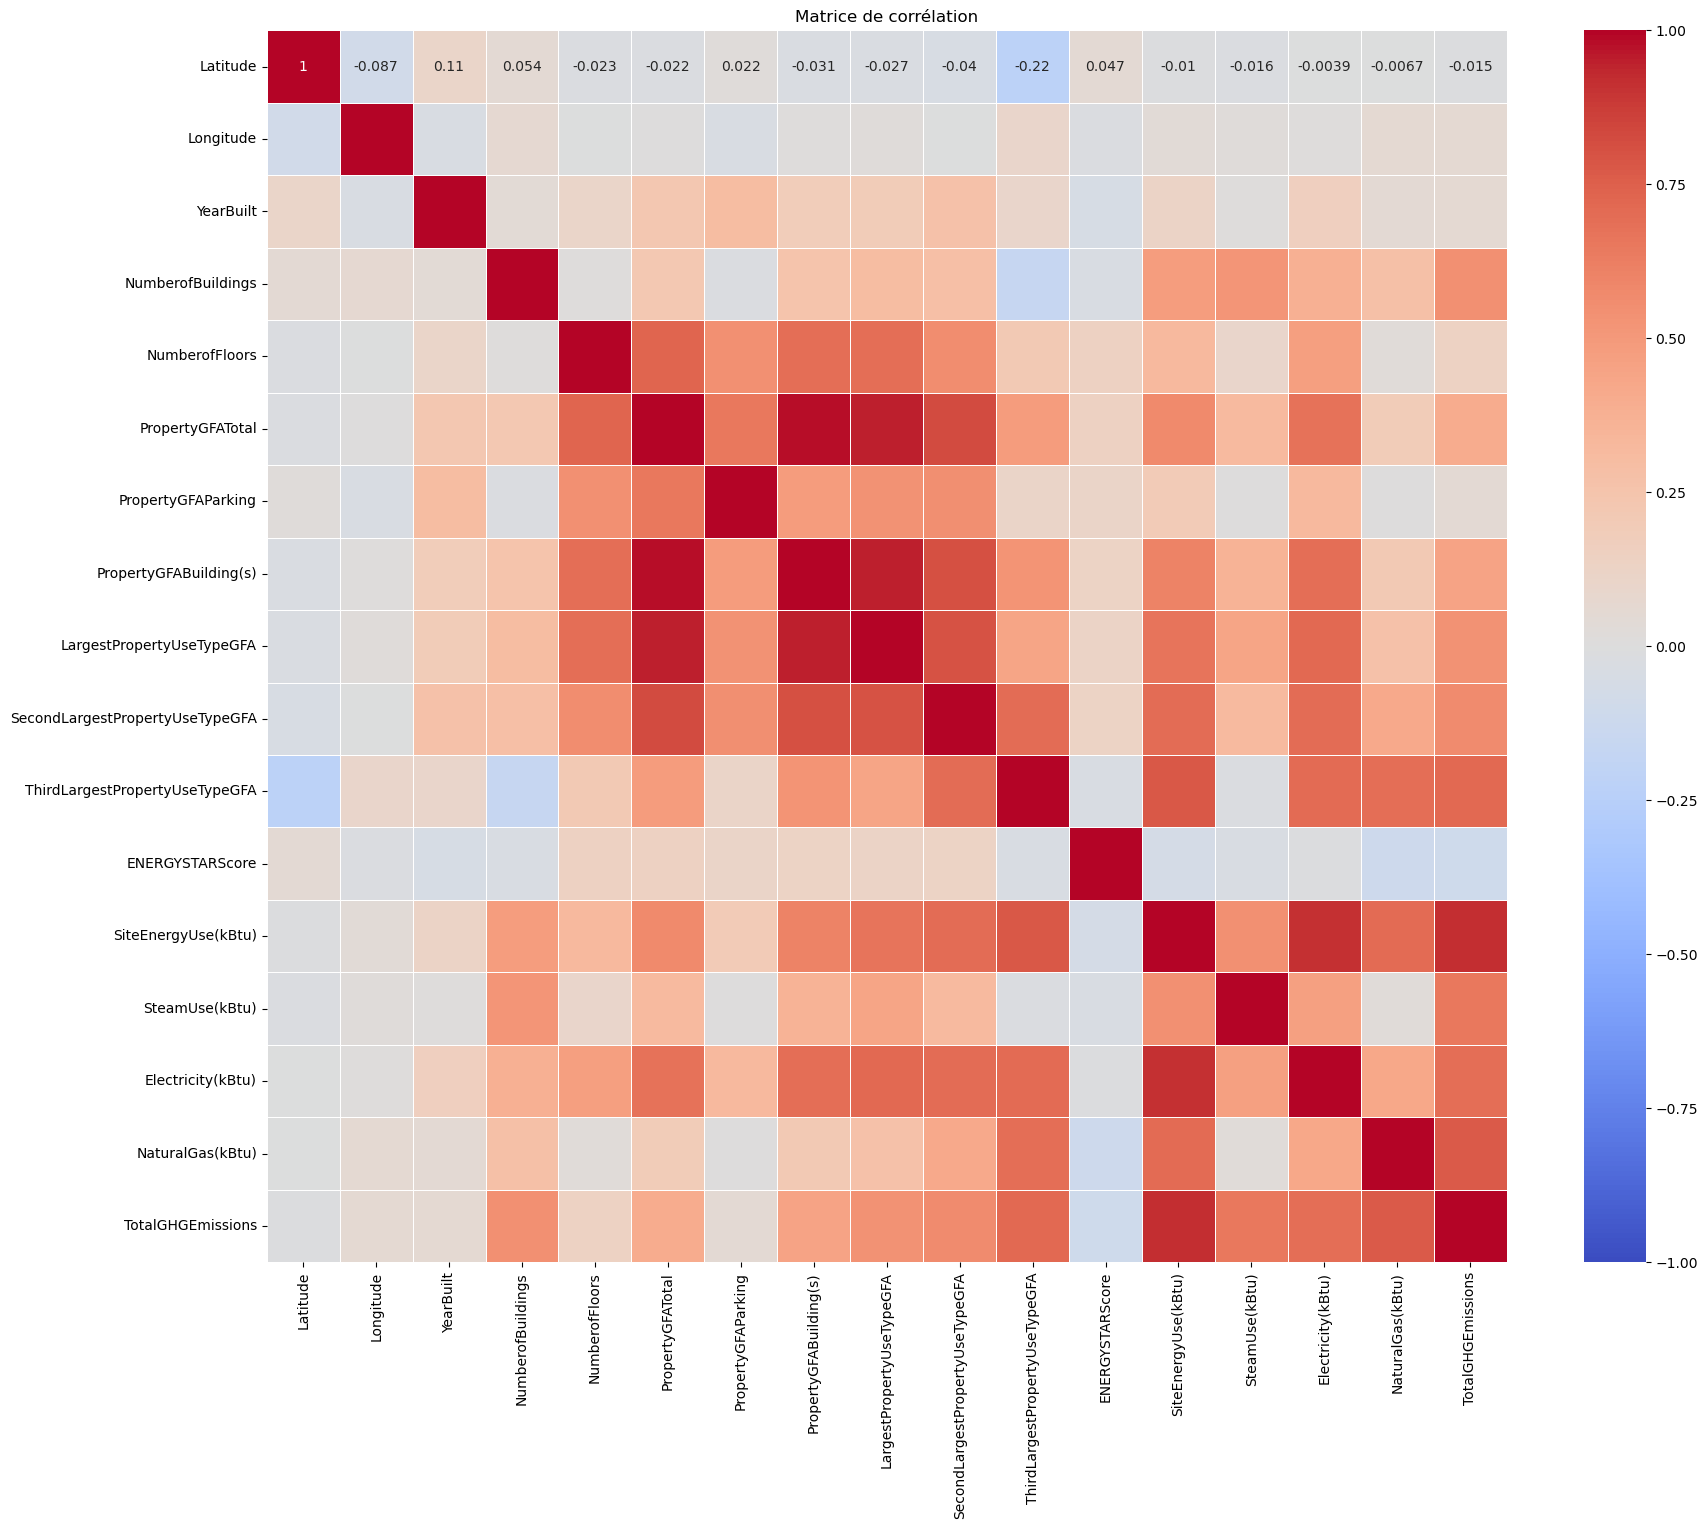

In [32]:
# Visualiser les corrélations entre les variables à l’aide d’une heatmap.

# Sélectionner uniquement les colonnes numériques

numerical_data = data14.select_dtypes(include=[np.number])

# Calculer la matrice de corrélation
correlation_matrix = numerical_data.corr()

# Visualiser la matrice de corrélation
plt.figure(figsize=(20, 16))
sns.heatmap(numerical_data.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de corrélation')
plt.show()

In [33]:
data14.dtypes

BuildingType                        object
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseType        object
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseType         object
ThirdLargestPropertyUseTypeGFA     float64
ENERGYSTARScore                    float64
SiteEnergyUse(kBtu)                float64
SteamUse(kBtu)                     float64
Electricity(kBtu)                  float64
NaturalGas(kBtu)                   float64
ComplianceStatus                    object
Outlier                             object
TotalGHGEmi

C:\Users\SOUKA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SOUKA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SOUKA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SOUKA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

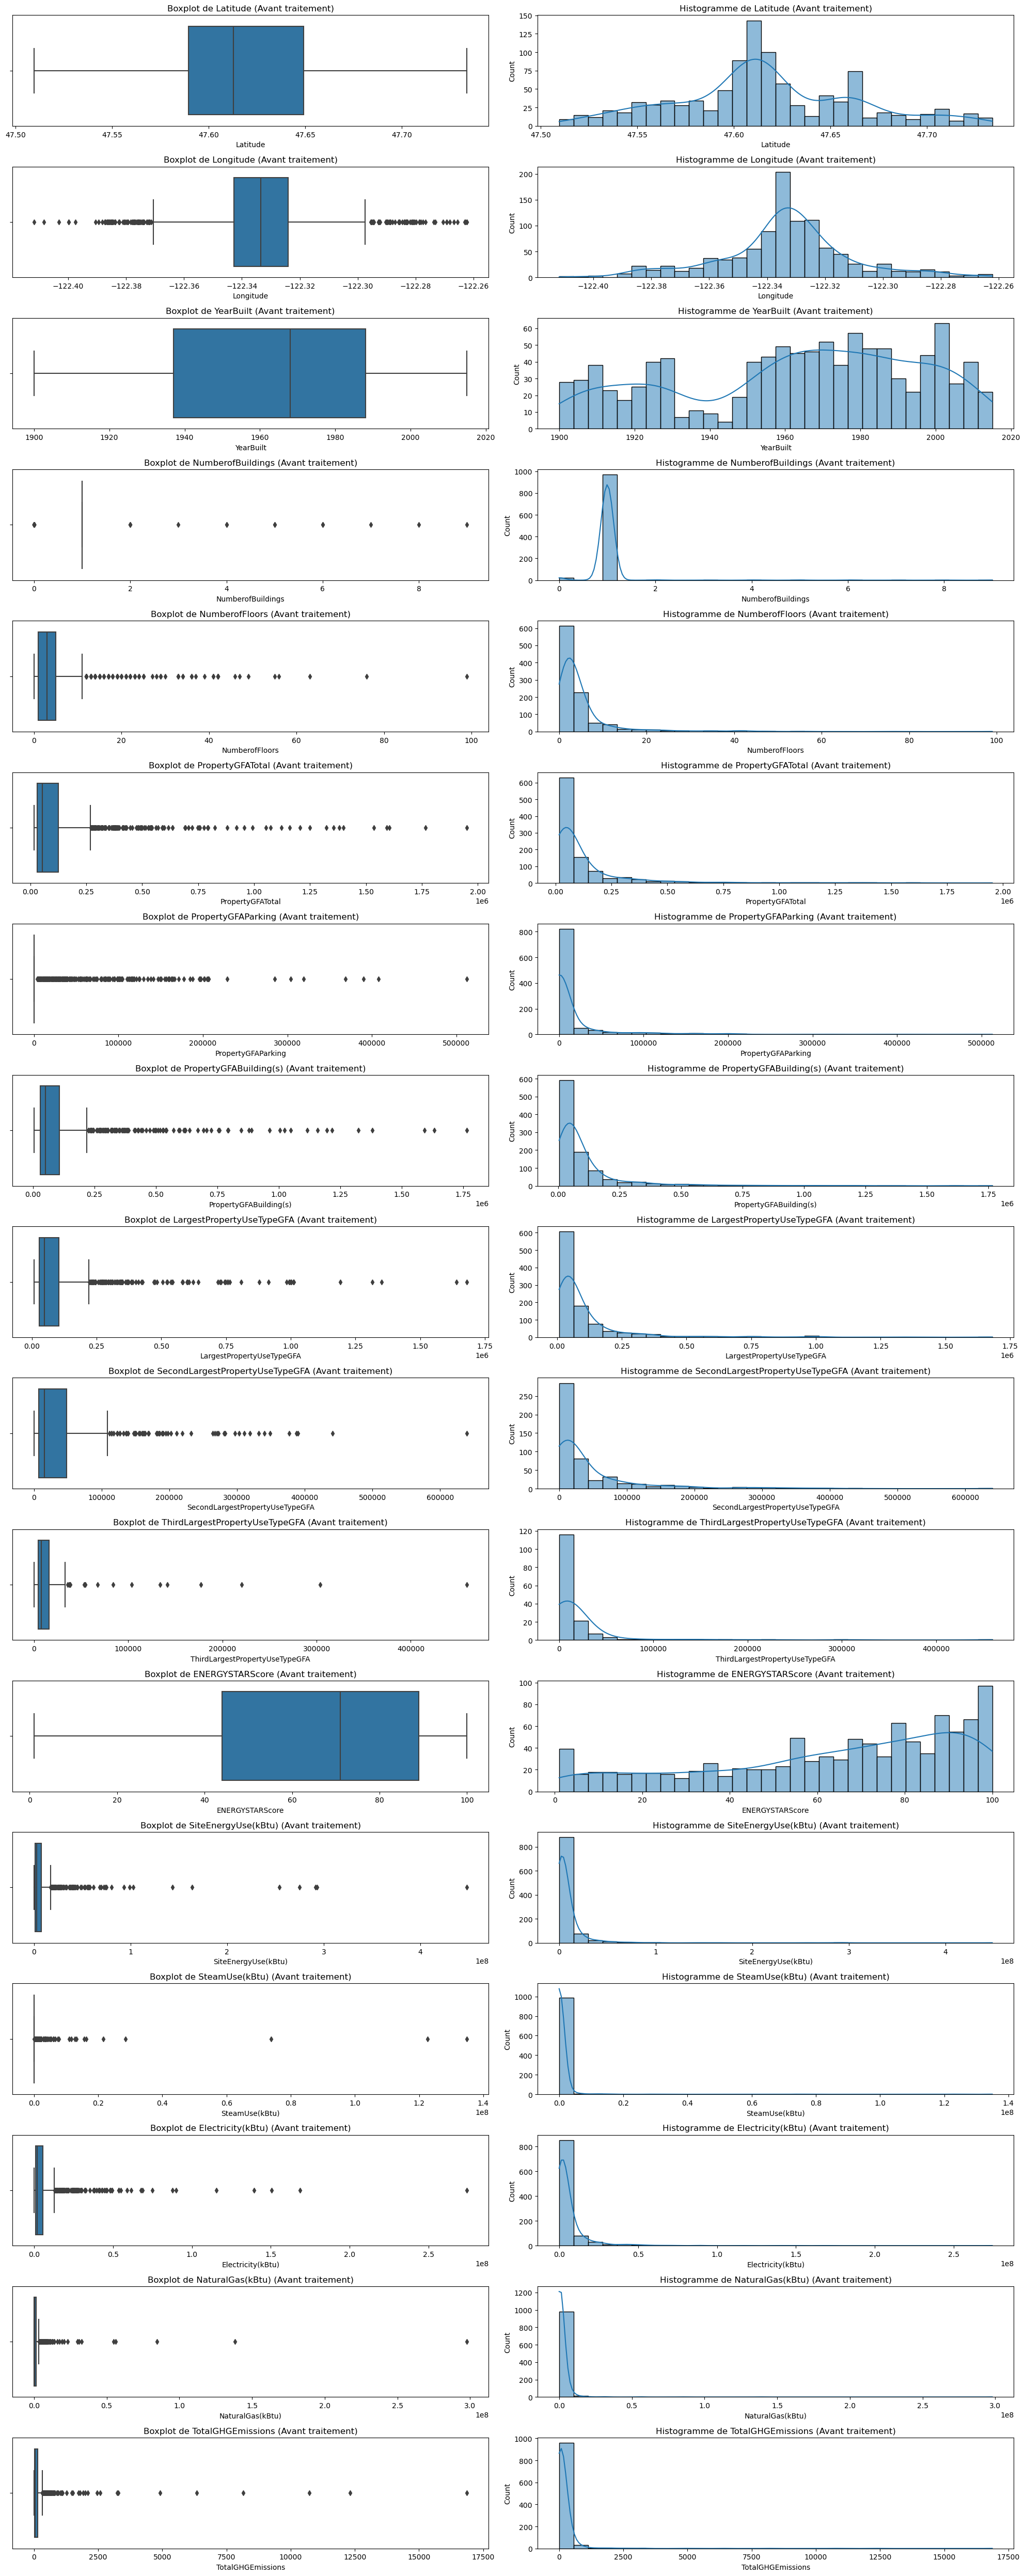

In [34]:
# Identifier les valeurs aberrantes

# Sélectionner toutes les variables numériques
numerical_features_before = ['Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 
                             'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 
                             'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 
                             'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 
                             'Electricity(kBtu)', 'NaturalGas(kBtu)', 
                             'TotalGHGEmissions']

# Boîtes à moustache et histogrammes pour toutes les variables numériques avant traitement
plt.figure(figsize=(20, 50))  # Ajustement de la taille de la figure
num_cols = 2  # Nombre de colonnes (2 pour avoir boxplot et histogramme côte à côte)
num_rows = len(numerical_features_before)  # Nombre de lignes

# Ajustement de l'espacement entre les sous-graphiques
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.6)

for i, feature in enumerate(numerical_features_before):
    # Boxplot
    plt.subplot(num_rows, num_cols, 2*i + 1)  # Position du subplot pour le boxplot
    sns.boxplot(x=data14[feature])
    plt.title(f'Boxplot de {feature} (Avant traitement)')
    
    # Histogramme
    plt.subplot(num_rows, num_cols, 2*i + 2)  # Position du subplot pour l'histogramme
    sns.histplot(data14[feature], bins=30, kde=True)
    plt.title(f'Histogramme de {feature} (Avant traitement)')

plt.tight_layout()
plt.show()

In [35]:
# Examiner les valeurs de "Outlier" et "ComplianceStatus", pour éliminer les bâtiments non pertinents.
print(data14['Outlier'].value_counts())
print(data14['ComplianceStatus'].value_counts())

Outlier
Low outlier     8
High outlier    1
Name: count, dtype: int64
ComplianceStatus
Compliant        997
Non-Compliant      9
Name: count, dtype: int64


In [36]:
# Supprimer les valeurs aberrantes basées sur la colonne "Outlier" si elles existent
if 'Outlier' in data14.columns:
    data15 = data14[data14['Outlier'] != 'TRUE']

In [37]:
# Supprimer les bâtiments non conformes si "ComplianceStatus" indique non-conformité
if 'ComplianceStatus' in data15.columns:
    data16 = data15[data15['ComplianceStatus'] == 'Compliant']

In [38]:
# Afficher mon dataframe après suppression des valeurs aberrantes et non compliantes
data16

,BuildingType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,Outlier,TotalGHGEmissions
0,NonResidential,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,...,NaN,NaN,60.0,7226362.50,2003882.00,3946027.0,1276453.0,Compliant,NaN,249.98
1,NonResidential,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,...,Restaurant,4622.000000,61.0,8387933.00,0.00,3242851.0,5145082.0,Compliant,NaN,295.86
2,NonResidential,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,...,NaN,NaN,43.0,72587024.00,21566554.00,49526664.0,1493800.0,Compliant,NaN,2089.28
3,NonResidential,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,...,NaN,NaN,56.0,6794584.00,2214446.25,2768924.0,1811213.0,Compliant,NaN,286.43
4,NonResidential,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,...,Swimming Pool,0.000000,75.0,14172606.00,0.00,5368607.0,8803998.0,Compliant,NaN,505.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,Nonresidential COS,LAKE UNION,47.62251,-122.33390,2014,1.0,13,536697,197659,339038,...,Retail Store,6313.200195,98.0,13239050.00,0.00,9925769.0,3313279.0,Compliant,NaN,245.16
3337,NonResidential,LAKE UNION,47.65476,-122.34732,2014,1.0,4,126823,41539,85284,...,Swimming Pool,0.000000,72.0,6042399.50,0.00,4115620.0,1926779.0,Compliant,NaN,131.02
3338,NonResidential,GREATER DUWAMISH,47.54425,-122.31776,1955,1.0,1,52085,4222,47863,...,NaN,NaN,37.0,3605855.50,0.00,732803.0,2873052.0,Compliant,NaN,157.70
3339,NonResidential,GREATER DUWAMISH,47.53161,-122.29944,1929,1.0,2,24990,0,24990,...,NaN,NaN,9.0,4420650.50,0.00,2167029.0,2253621.0,Compliant,NaN,134.80


In [39]:
data16['Outlier'].unique()

array([nan], dtype=object)

In [40]:
data16['ComplianceStatus'].unique()

array(['Compliant'], dtype=object)

In [41]:
# Supprimer les colonnes 'ComplianceStatus' avec valeur unique (Compliant) et 'Outlier' avec que des NaN, après suppression des outliers et de non compliant data
data17 = data16.drop(columns=['ComplianceStatus', 'Outlier'])
data17

,BuildingType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions
0,NonResidential,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,...,NaN,NaN,NaN,NaN,60.0,7226362.50,2003882.00,3946027.0,1276453.0,249.98
1,NonResidential,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,...,Parking,15064.0,Restaurant,4622.000000,61.0,8387933.00,0.00,3242851.0,5145082.0,295.86
2,NonResidential,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,...,NaN,NaN,NaN,NaN,43.0,72587024.00,21566554.00,49526664.0,1493800.0,2089.28
3,NonResidential,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,...,NaN,NaN,NaN,NaN,56.0,6794584.00,2214446.25,2768924.0,1811213.0,286.43
4,NonResidential,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,...,Parking,68009.0,Swimming Pool,0.000000,75.0,14172606.00,0.00,5368607.0,8803998.0,505.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,Nonresidential COS,LAKE UNION,47.62251,-122.33390,2014,1.0,13,536697,197659,339038,...,Parking,202178.0,Retail Store,6313.200195,98.0,13239050.00,0.00,9925769.0,3313279.0,245.16
3337,NonResidential,LAKE UNION,47.65476,-122.34732,2014,1.0,4,126823,41539,85284,...,Parking,41539.0,Swimming Pool,0.000000,72.0,6042399.50,0.00,4115620.0,1926779.0,131.02
3338,NonResidential,GREATER DUWAMISH,47.54425,-122.31776,1955,1.0,1,52085,4222,47863,...,NaN,NaN,NaN,NaN,37.0,3605855.50,0.00,732803.0,2873052.0,157.70
3339,NonResidential,GREATER DUWAMISH,47.53161,-122.29944,1929,1.0,2,24990,0,24990,...,NaN,NaN,NaN,NaN,9.0,4420650.50,0.00,2167029.0,2253621.0,134.80


In [42]:
# Afficher les statistiques descriptives après traitement
print("\nStatistiques descriptives après traitement des valeurs aberrantes et de conformité :")
data16.describe()


Statistiques descriptives après traitement des valeurs aberrantes et de conformité :


,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions
count,997.000000,997.000000,997.000000,997.000000,997.000000,9.970000e+02,997.000000,9.970000e+02,9.950000e+02,492.000000,155.000000,997.000000,9.970000e+02,9.970000e+02,9.970000e+02,9.970000e+02,997.000000
mean,47.616508,-122.333581,1963.231695,1.022066,5.141424,1.299489e+05,16590.631896,1.133583e+05,1.067558e+05,45122.741254,20895.729669,63.635908,8.879682e+06,5.987737e+05,6.269409e+06,1.979620e+06,195.062177
std,0.047200,0.022720,32.018310,0.514366,8.160603,2.121944e+05,47676.213386,1.847456e+05,1.722949e+05,74784.170774,51581.480202,28.825309,2.582249e+07,6.433669e+06,1.571682e+07,1.130586e+07,861.727493
min,47.509590,-122.411820,1900.000000,0.000000,0.000000,1.630000e+04,0.000000,3.636000e+03,8.061000e+03,0.000000,0.000000,1.000000,7.971180e+04,0.000000e+00,-1.154170e+05,0.000000e+00,-0.800000
25%,47.589580,-122.342740,1937.000000,1.000000,1.000000,3.156900e+04,0.000000,3.024000e+04,2.781900e+04,7000.000000,4333.000000,44.000000,1.269848e+06,0.000000e+00,7.870540e+05,0.000000e+00,20.300000
50%,47.612850,-122.333390,1968.000000,1.000000,3.000000,5.373000e+04,0.000000,5.075900e+04,4.815900e+04,15692.500000,8000.000000,71.000000,2.826828e+06,0.000000e+00,1.884294e+06,3.991220e+05,49.740000
75%,47.649120,-122.324170,1988.000000,1.000000,5.000000,1.268230e+05,0.000000,1.079300e+05,1.048285e+05,48559.750000,15965.500000,88.000000,7.739699e+06,0.000000e+00,5.652230e+06,1.387450e+06,144.410000
max,47.733870,-122.262230,2015.000000,9.000000,99.000000,1.952220e+06,512608.000000,1.765970e+06,1.680937e+06,639931.000000,459748.000000,100.000000,4.483853e+08,1.349435e+08,2.745325e+08,2.979090e+08,16870.980000


C:\Users\SOUKA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


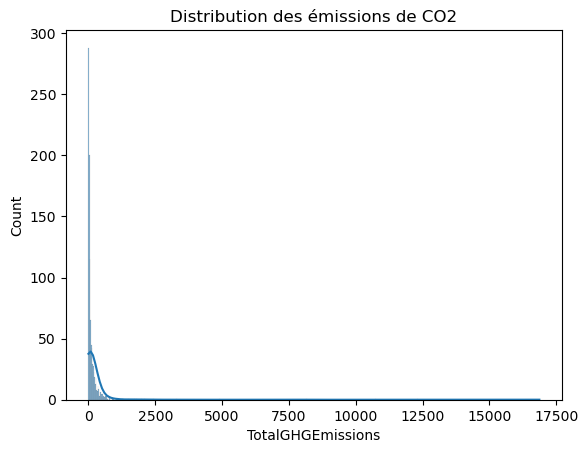

In [43]:
# Visualisation des distributions
sns.histplot(data17['TotalGHGEmissions'], kde=True)
plt.title('Distribution des émissions de CO2')
plt.show()

C:\Users\SOUKA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


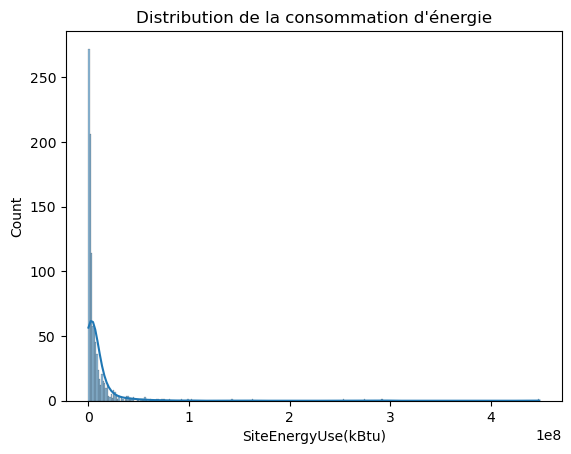

In [44]:
# Visualisation des distributions
sns.histplot(data17['SiteEnergyUse(kBtu)'], kde=True)
plt.title('Distribution de la consommation d\'énergie')
plt.show()

C:\Users\SOUKA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SOUKA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


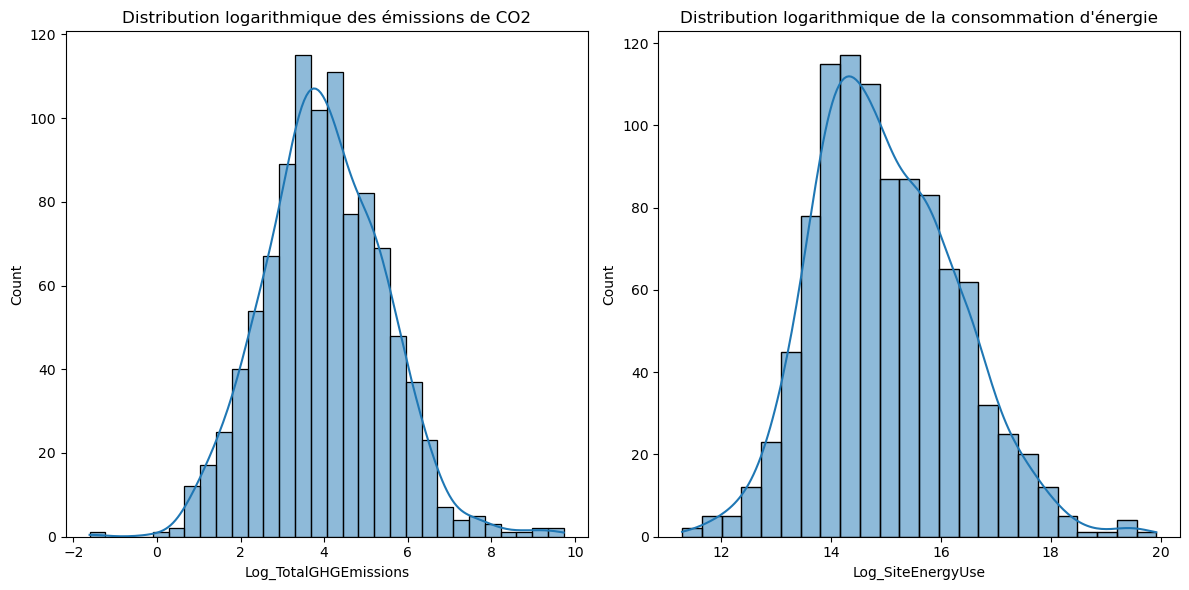

In [45]:
# Visualiser les distributions des variables cibles (émissions de CO2 et consommation d’énergie) à l’aide d’histogrammes 

# Appliquer la transformation logarithmique
data17['Log_TotalGHGEmissions'] = np.log1p(data17['TotalGHGEmissions'])  # np.log1p est utilisé pour log(1 + x) pour éviter log(0)
data17['Log_SiteEnergyUse'] = np.log1p(data17['SiteEnergyUse(kBtu)'])

# Visualisation des distributions avec transformation logarithmique
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data17['Log_TotalGHGEmissions'], kde=True)
plt.title('Distribution logarithmique des émissions de CO2')

plt.subplot(1, 2, 2)
sns.histplot(data17['Log_SiteEnergyUse'], kde=True)
plt.title('Distribution logarithmique de la consommation d\'énergie')

plt.tight_layout()
plt.savefig("distributions_cibles.png")
plt.show()

In [46]:
# Déplacer la colonne 'SiteEnergyUse(kBtu)' entre les colonnes  'Log_TotalGHGEmissions' et 'Log_TotalGHGEmissions'
# Obtenir la liste des colonnes
cols = list(data17.columns)

# Déplacer la colonne 'SiteEnergyUse(kBtu)' entre 'Log_TotalGHGEmissions' et 'Log_TotalGHGEmissions'
cols.insert(cols.index('Log_TotalGHGEmissions'), cols.pop(cols.index('SiteEnergyUse(kBtu)')))

# Réorganiser le dataframe avec les colonnes réordonnées
data17 = data17[cols]

# Afficher la dataframe pour vérifier que les colonnes ont été réorganisées
data17

,BuildingType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,Log_TotalGHGEmissions,SiteEnergyUse(kBtu),Log_SiteEnergyUse
0,NonResidential,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,...,NaN,NaN,60.0,2003882.00,3946027.0,1276453.0,249.98,5.525373,7226362.50,15.793246
1,NonResidential,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,...,Restaurant,4622.000000,61.0,0.00,3242851.0,5145082.0,295.86,5.693261,8387933.00,15.942305
2,NonResidential,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,...,NaN,NaN,43.0,21566554.00,49526664.0,1493800.0,2089.28,7.645053,72587024.00,18.100297
3,NonResidential,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,...,NaN,NaN,56.0,2214446.25,2768924.0,1811213.0,286.43,5.660979,6794584.00,15.731637
4,NonResidential,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,...,Swimming Pool,0.000000,75.0,0.00,5368607.0,8803998.0,505.01,6.226556,14172606.00,16.466822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,Nonresidential COS,LAKE UNION,47.62251,-122.33390,2014,1.0,13,536697,197659,339038,...,Retail Store,6313.200195,98.0,0.00,9925769.0,3313279.0,245.16,5.505982,13239050.00,16.398681
3337,NonResidential,LAKE UNION,47.65476,-122.34732,2014,1.0,4,126823,41539,85284,...,Swimming Pool,0.000000,72.0,0.00,4115620.0,1926779.0,131.02,4.882953,6042399.50,15.614312
3338,NonResidential,GREATER DUWAMISH,47.54425,-122.31776,1955,1.0,1,52085,4222,47863,...,NaN,NaN,37.0,0.00,732803.0,2873052.0,157.70,5.067016,3605855.50,15.098070
3339,NonResidential,GREATER DUWAMISH,47.53161,-122.29944,1929,1.0,2,24990,0,24990,...,NaN,NaN,9.0,0.00,2167029.0,2253621.0,134.80,4.911183,4420650.50,15.301798


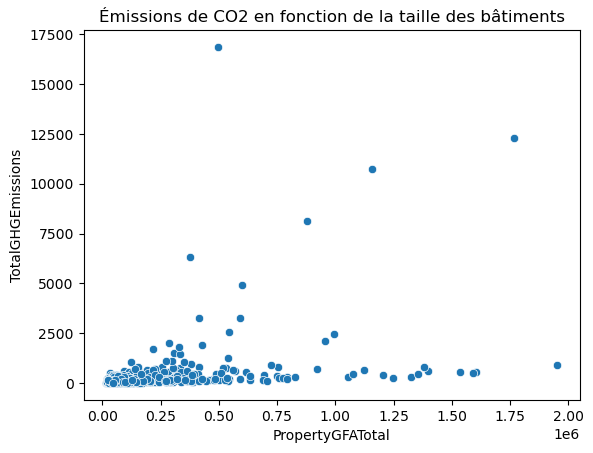

In [47]:
# Utiliser des scatter plots pour explorer les relations entre les variables indépendantes et les variables cibles.

# Scatter plot des émissions de CO2 vs taille des bâtiments
sns.scatterplot(x='PropertyGFATotal', y='TotalGHGEmissions', data=data17)
plt.title('Émissions de CO2 en fonction de la taille des bâtiments')
plt.show()

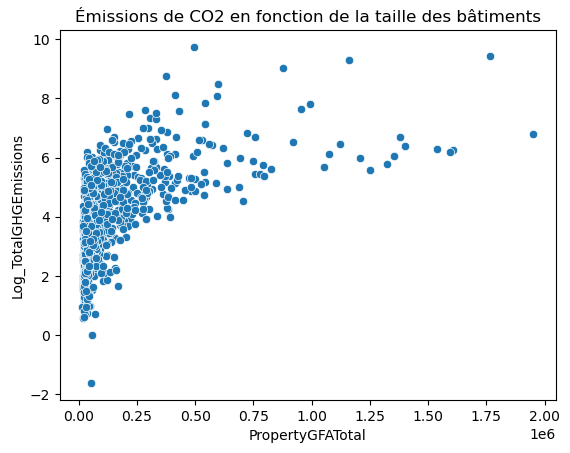

In [48]:
# Utiliser des scatter plots pour explorer les relations entre les variables indépendantes et les variables cibles.

# Scatter plot des émissions de CO2 vs taille des bâtiments
sns.scatterplot(x='PropertyGFATotal', y='Log_TotalGHGEmissions', data=data17)
plt.title('Émissions de CO2 en fonction de la taille des bâtiments')
plt.show()

C:\Users\SOUKA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


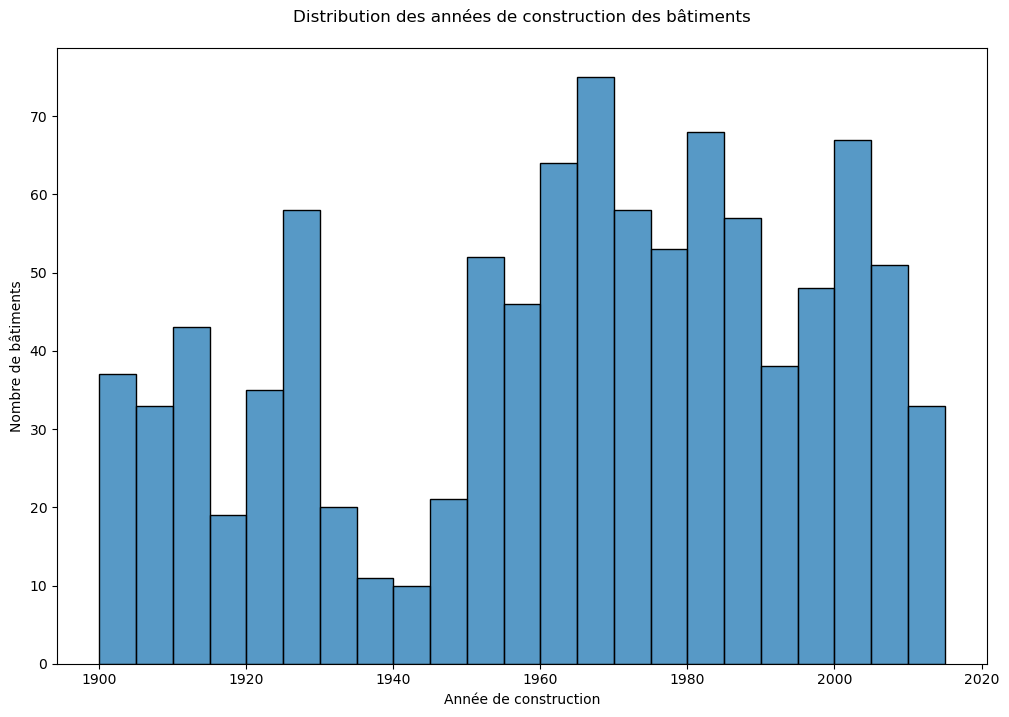

In [49]:
#  regarder les distribution des années de construction des bâtiments de Seattle :
fig = plt.figure(figsize=(12, 8))
ax = sns.histplot(data=data17, x='YearBuilt', bins=int((data17.YearBuilt.max() - data17.YearBuilt.min())/5))
ax.set_xlabel("Année de construction")
ax.set_ylabel("Nombre de bâtiments")
plt.title("Distribution des années de construction des bâtiments\n")
plt.savefig("distribution_années.png")
plt.show()

C:\Users\SOUKA\AppData\Local\Temp\ipykernel_25396\4185190935.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data17['BuildingAge'] = 2016 - data17['YearBuilt']
C:\Users\SOUKA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


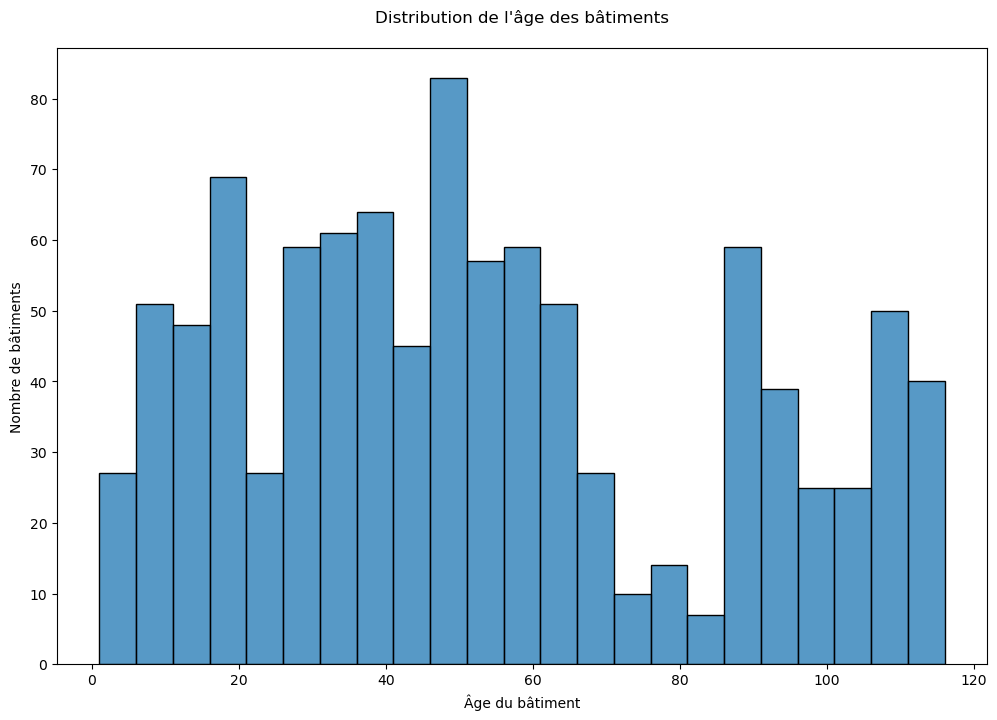

In [50]:
# Création de la variable Age du bâtiment
# on sait que DataYear est 2016
# Créer la variable 'Age du bâtiment' ou 'BuildingAge' qui sera plus intéressante à traiter pour réduire la dispersion des données et lier l'année des relevés
data17['BuildingAge'] = 2016 - data17['YearBuilt']

# Supprimer la variable 'YearBuilt'
data17.drop('YearBuilt', axis=1, inplace=True)

# Représenter graphiquement la distribution de l'âge des bâtiments
fig = plt.figure(figsize=(12, 8))
ax = sns.histplot(data=data17, x='BuildingAge', bins=int((data17.BuildingAge.max() - data17.BuildingAge.min())/5))
ax.set_xlabel("Âge du bâtiment")
ax.set_ylabel("Nombre de bâtiments")
plt.title("Distribution de l'âge des bâtiments\n")
plt.savefig("distribution_age.png")
plt.show()

In [51]:
# Afficher la matrice de corrélation
# Sélectionner les colonnes numériques
numeric_data = data17.select_dtypes(include=[np.number])

# Calcul de la matrice de corrélation
corr = numeric_data.corr()

# Afficher la matrice de corrélation dans la console
corr

,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,Log_TotalGHGEmissions,SiteEnergyUse(kBtu),Log_SiteEnergyUse,BuildingAge
Latitude,1.000000,-0.094520,0.058287,-0.023533,-0.022674,0.021492,-0.031589,-0.027837,-0.039664,-0.221233,0.050662,-0.016532,-0.004904,-0.007008,-0.015034,0.062645,-0.011121,0.058756,-0.103761
Longitude,-0.094520,1.000000,0.069061,-0.002989,0.005393,-0.036505,0.015615,0.019110,-0.001591,0.096633,-0.030305,0.021250,0.016635,0.060189,0.056301,0.020129,0.040762,-0.004327,0.031815
NumberofBuildings,0.058287,0.069061,1.000000,0.008584,0.224777,-0.016250,0.262367,0.309439,0.284283,-0.159614,-0.044895,0.534332,0.390301,0.286213,0.556989,0.214367,0.495982,0.186779,-0.058397
NumberofFloors,-0.023533,-0.002989,0.008584,1.000000,0.726304,0.545670,0.693397,0.690889,0.554623,0.213957,0.151061,0.097305,0.470693,0.025417,0.133634,0.359791,0.321335,0.478957,-0.105602
PropertyGFATotal,-0.022674,0.005393,0.224777,0.726304,1.000000,0.650836,0.980618,0.947927,0.826585,0.485007,0.146248,0.317442,0.673124,0.189536,0.400594,0.526031,0.571412,0.657798,-0.228202
PropertyGFAParking,0.021492,-0.036505,-0.016250,0.545670,0.650836,1.000000,0.489471,0.534622,0.549281,0.114682,0.120628,0.004389,0.323461,0.005979,0.047823,0.286353,0.200197,0.424842,-0.296797
PropertyGFABuilding(s),-0.031589,0.015615,0.262367,0.693397,0.980618,0.489471,1.000000,0.950775,0.804699,0.527422,0.136847,0.363474,0.689661,0.216153,0.447771,0.530289,0.604646,0.645894,-0.185514
LargestPropertyUseTypeGFA,-0.027837,0.019110,0.309439,0.690889,0.947927,0.534622,0.950775,1.000000,0.801403,0.439913,0.128654,0.440631,0.718762,0.272558,0.535247,0.549264,0.666250,0.657239,-0.193122
SecondLargestPropertyUseTypeGFA,-0.039664,-0.001591,0.284283,0.554623,0.826585,0.549281,0.804699,0.801403,1.000000,0.701508,0.136737,0.319992,0.697328,0.420720,0.567754,0.552223,0.697916,0.660258,-0.272589
ThirdLargestPropertyUseTypeGFA,-0.221233,0.096633,-0.159614,0.213957,0.485007,0.114682,0.527422,0.439913,0.701508,1.000000,-0.044430,-0.017644,0.707015,0.691409,0.711073,0.426894,0.774738,0.459444,-0.100995


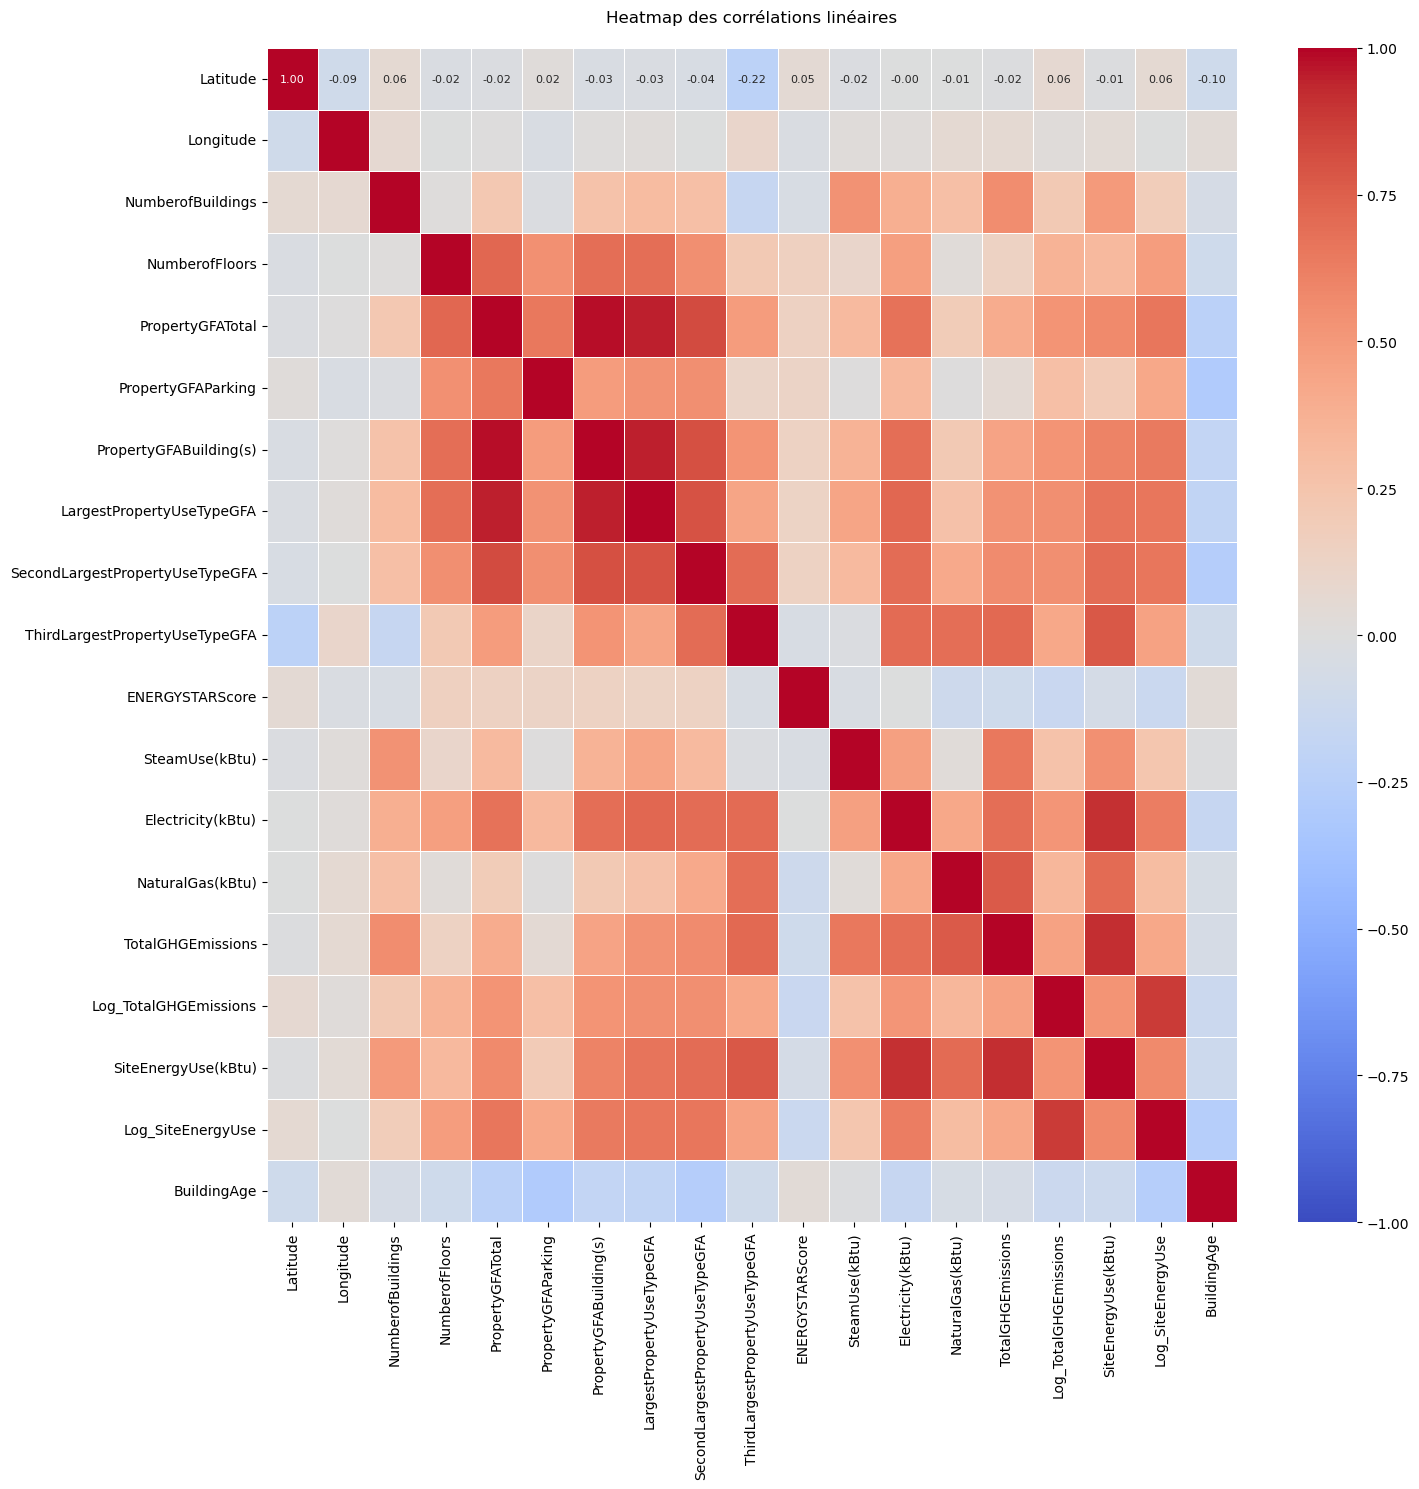

In [52]:
# Tracer la Heatmap de la Matrice de Corrélation

# Création de la figure et de l'axe
fig, ax = plt.subplots(figsize=(15, 15))

# Tracé de la heatmap
ax = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt=".2f", annot_kws={'size':8}, center=0, cmap="coolwarm", linewidths=.5)

# Ajout du titre
plt.title("Heatmap des corrélations linéaires\n")

plt.tight_layout()
plt.savefig("Heatmap.png")

# Affichage de la figure
plt.show()

In [53]:
# Identifier et Afficher les Paires de Variables ayant une Corrélation Supérieure à 0.7
# Trouver les paires de variables avec corrélation > 0.7
high_corr = (corr.abs() > 0.7) & (corr.abs() < 1.0)  # Filtrer les corrélations entre 0.7 et 1.0 (exclure 1.0)

# Créer une liste pour stocker les paires de variables
high_corr_pairs = []

# Itérer sur les paires de variables et ajouter celles qui ont une corrélation > 0.7
for i in range(len(corr.columns)):
    for j in range(i):
        if high_corr.iloc[i, j]:
            high_corr_pairs.append((corr.index[i], corr.columns[j], corr.iloc[i, j]))

# Afficher les paires de variables avec une corrélation > 0.7
print("Paires de variables avec une corrélation supérieure à 0.7:")
for pair in high_corr_pairs:
    print(pair)

Paires de variables avec une corrélation supérieure à 0.7:
('PropertyGFATotal', 'NumberofFloors', 0.7263035817006738)
('PropertyGFABuilding(s)', 'PropertyGFATotal', 0.9806184993315311)
('LargestPropertyUseTypeGFA', 'PropertyGFATotal', 0.9479271331650464)
('LargestPropertyUseTypeGFA', 'PropertyGFABuilding(s)', 0.9507752925309559)
('SecondLargestPropertyUseTypeGFA', 'PropertyGFATotal', 0.8265851819738126)
('SecondLargestPropertyUseTypeGFA', 'PropertyGFABuilding(s)', 0.8046994940007259)
('SecondLargestPropertyUseTypeGFA', 'LargestPropertyUseTypeGFA', 0.8014033156596)
('ThirdLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 0.7015075700465392)
('Electricity(kBtu)', 'LargestPropertyUseTypeGFA', 0.7187621394287954)
('Electricity(kBtu)', 'ThirdLargestPropertyUseTypeGFA', 0.7070152314412533)
('TotalGHGEmissions', 'ThirdLargestPropertyUseTypeGFA', 0.7110733488280777)
('TotalGHGEmissions', 'NaturalGas(kBtu)', 0.766987808107392)
('SiteEnergyUse(kBtu)', 'ThirdLargestPropertyUseTypeGFA

In [54]:
print(data17.columns)

Index(['BuildingType', 'Neighborhood', 'Latitude', 'Longitude',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions', 'Log_TotalGHGEmissions',
       'SiteEnergyUse(kBtu)', 'Log_SiteEnergyUse', 'BuildingAge'],
      dtype='object')


In [55]:
# Supprimer les variable inutiles et qui sont à forte corrélation avec une autre variable

# Colonnes corrélées à supprimer
cols_to_drop = ['LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'PropertyGFAParking', 'PropertyGFABuilding(s)']

# Suppression des colonnes
data18 = data17.drop(columns=cols_to_drop)
data18

,BuildingType,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,ENERGYSTARScore,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,Log_TotalGHGEmissions,SiteEnergyUse(kBtu),Log_SiteEnergyUse,BuildingAge
0,NonResidential,DOWNTOWN,47.61220,-122.33799,1.0,12,88434,Hotel,60.0,2003882.00,3946027.0,1276453.0,249.98,5.525373,7226362.50,15.793246,89
1,NonResidential,DOWNTOWN,47.61317,-122.33393,1.0,11,103566,Hotel,61.0,0.00,3242851.0,5145082.0,295.86,5.693261,8387933.00,15.942305,20
2,NonResidential,DOWNTOWN,47.61393,-122.33810,1.0,41,956110,Hotel,43.0,21566554.00,49526664.0,1493800.0,2089.28,7.645053,72587024.00,18.100297,47
3,NonResidential,DOWNTOWN,47.61412,-122.33664,1.0,10,61320,Hotel,56.0,2214446.25,2768924.0,1811213.0,286.43,5.660979,6794584.00,15.731637,90
4,NonResidential,DOWNTOWN,47.61375,-122.34047,1.0,18,175580,Hotel,75.0,0.00,5368607.0,8803998.0,505.01,6.226556,14172606.00,16.466822,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,Nonresidential COS,LAKE UNION,47.62251,-122.33390,1.0,13,536697,Office,98.0,0.00,9925769.0,3313279.0,245.16,5.505982,13239050.00,16.398681,2
3337,NonResidential,LAKE UNION,47.65476,-122.34732,1.0,4,126823,Hotel,72.0,0.00,4115620.0,1926779.0,131.02,4.882953,6042399.50,15.614312,2
3338,NonResidential,GREATER DUWAMISH,47.54425,-122.31776,1.0,1,52085,Non-Refrigerated Warehouse,37.0,0.00,732803.0,2873052.0,157.70,5.067016,3605855.50,15.098070,61
3339,NonResidential,GREATER DUWAMISH,47.53161,-122.29944,1.0,2,24990,Office,9.0,0.00,2167029.0,2253621.0,134.80,4.911183,4420650.50,15.301798,87


In [56]:
def heatmap_correlation_colonnes(df, seuil_corr=0.70, figsize=(16, 8), output_file='heatmap.png'):
    # Calculer la matrice de corrélation
    corr = data18.corr(numeric_only=True)

    # Créer la heatmap
    fig, ax = plt.subplots(figsize=figsize)
    heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap="coolwarm", linewidths=.5, fmt=".2f", ax=ax)

    # Incliner le texte des colonnes
    heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=55, ha='right')

    # Trouver les colonnes fortement corrélées
    correlated_pairs = []
    correlation_values = {}  # un dictionnaire pour stocker les valeurs de corrélation

    for i in range(len(corr.columns)):
        for j in range(i + 1, len(corr.columns)):
            if corr.iloc[i, j] >= seuil_corr:
                col1 = corr.columns[i]
                col2 = corr.columns[j]
                correlated_pairs.append((col1, col2))
                correlation_values[(col1, col2)] = corr.iloc[i, j]

    # Afficher les colonnes fortement corrélées et leurs valeurs de corrélation
    print("Les paires de colonnes fortement corrélées entre elles sont :")
    for pair in correlated_pairs:
        print(f"{pair[0]} et {pair[1]} : {correlation_values[pair]:.2f}")

    # Ajout du titre
    plt.title("Heatmap des corrélations linéaires\n")

    plt.tight_layout()
    
    # Enregistrer la heatmap sous format d'image
    plt.savefig(output_file)

    # Afficher la heatmap
    plt.show()

    return correlated_pairs, correlation_values

Les paires de colonnes fortement corrélées entre elles sont :
NumberofFloors et PropertyGFATotal : 0.73
Electricity(kBtu) et SiteEnergyUse(kBtu) : 0.91
NaturalGas(kBtu) et TotalGHGEmissions : 0.77
NaturalGas(kBtu) et SiteEnergyUse(kBtu) : 0.70
TotalGHGEmissions et SiteEnergyUse(kBtu) : 0.92
Log_TotalGHGEmissions et Log_SiteEnergyUse : 0.88


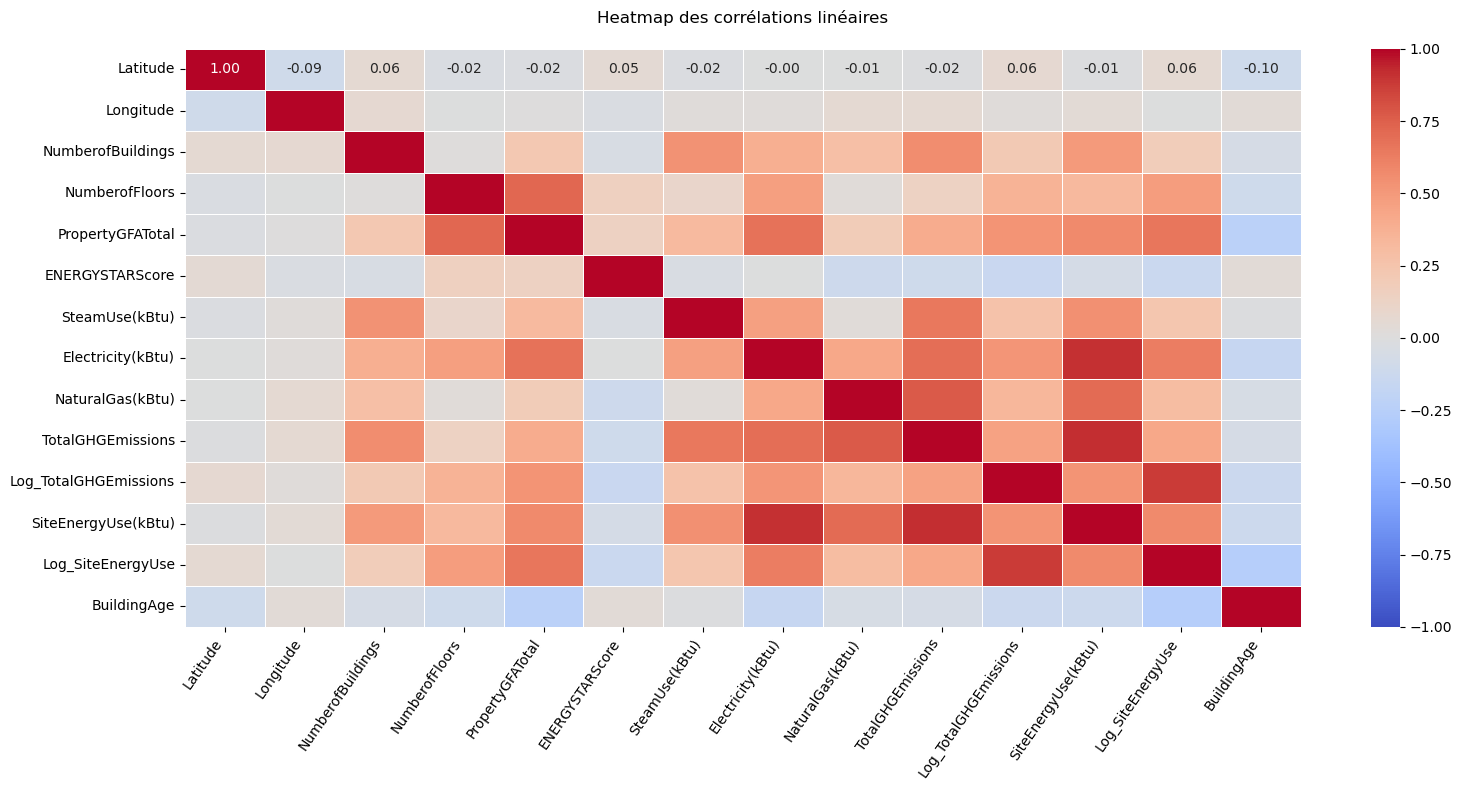

In [57]:
correlated_pairs, correlation_values = heatmap_correlation_colonnes(df, seuil_corr=0.70, output_file='ma_heatmap.png')

### Suppression des variables SteamUse(kBtu), Electricity(kBtu) et NaturalGas(therms)

- Car, garder SteamUse(kBtu), Electricity(kBtu) et NaturalGas(therms) causerait un problème de data-leakage car ces variables sont directement corrélées avec nos variables cibles TotalGHGEmissions et SiteEnergyUse(kBtu), donc on va les supprimer.
 ts

In [58]:
# Supprimer ces colonnes du dataframe
data19 = data18.drop(['SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)'], axis=1)
data19

,BuildingType,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,ENERGYSTARScore,TotalGHGEmissions,Log_TotalGHGEmissions,SiteEnergyUse(kBtu),Log_SiteEnergyUse,BuildingAge
0,NonResidential,DOWNTOWN,47.61220,-122.33799,1.0,12,88434,Hotel,60.0,249.98,5.525373,7226362.50,15.793246,89
1,NonResidential,DOWNTOWN,47.61317,-122.33393,1.0,11,103566,Hotel,61.0,295.86,5.693261,8387933.00,15.942305,20
2,NonResidential,DOWNTOWN,47.61393,-122.33810,1.0,41,956110,Hotel,43.0,2089.28,7.645053,72587024.00,18.100297,47
3,NonResidential,DOWNTOWN,47.61412,-122.33664,1.0,10,61320,Hotel,56.0,286.43,5.660979,6794584.00,15.731637,90
4,NonResidential,DOWNTOWN,47.61375,-122.34047,1.0,18,175580,Hotel,75.0,505.01,6.226556,14172606.00,16.466822,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,Nonresidential COS,LAKE UNION,47.62251,-122.33390,1.0,13,536697,Office,98.0,245.16,5.505982,13239050.00,16.398681,2
3337,NonResidential,LAKE UNION,47.65476,-122.34732,1.0,4,126823,Hotel,72.0,131.02,4.882953,6042399.50,15.614312,2
3338,NonResidential,GREATER DUWAMISH,47.54425,-122.31776,1.0,1,52085,Non-Refrigerated Warehouse,37.0,157.70,5.067016,3605855.50,15.098070,61
3339,NonResidential,GREATER DUWAMISH,47.53161,-122.29944,1.0,2,24990,Office,9.0,134.80,4.911183,4420650.50,15.301798,87


### Suppression des variables 'Latitude', 'Longitude' et 'BuildingAge' non corrélées avec les variables cibles

In [59]:
# Supprimer ces colonnes du dataframe, car ils ne sont pas corrélées avec nos 2 cibles
data20 = data19.drop(['Latitude', 'Longitude', 'BuildingAge'], axis=1)
data20

,BuildingType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,ENERGYSTARScore,TotalGHGEmissions,Log_TotalGHGEmissions,SiteEnergyUse(kBtu),Log_SiteEnergyUse
0,NonResidential,DOWNTOWN,1.0,12,88434,Hotel,60.0,249.98,5.525373,7226362.50,15.793246
1,NonResidential,DOWNTOWN,1.0,11,103566,Hotel,61.0,295.86,5.693261,8387933.00,15.942305
2,NonResidential,DOWNTOWN,1.0,41,956110,Hotel,43.0,2089.28,7.645053,72587024.00,18.100297
3,NonResidential,DOWNTOWN,1.0,10,61320,Hotel,56.0,286.43,5.660979,6794584.00,15.731637
4,NonResidential,DOWNTOWN,1.0,18,175580,Hotel,75.0,505.01,6.226556,14172606.00,16.466822
...,...,...,...,...,...,...,...,...,...,...,...
3329,Nonresidential COS,LAKE UNION,1.0,13,536697,Office,98.0,245.16,5.505982,13239050.00,16.398681
3337,NonResidential,LAKE UNION,1.0,4,126823,Hotel,72.0,131.02,4.882953,6042399.50,15.614312
3338,NonResidential,GREATER DUWAMISH,1.0,1,52085,Non-Refrigerated Warehouse,37.0,157.70,5.067016,3605855.50,15.098070
3339,NonResidential,GREATER DUWAMISH,1.0,2,24990,Office,9.0,134.80,4.911183,4420650.50,15.301798


In [60]:
# Vérifier les valeurs manquantes
data20.isnull().sum()

BuildingType              0
Neighborhood              0
NumberofBuildings         0
NumberofFloors            0
PropertyGFATotal          0
LargestPropertyUseType    2
ENERGYSTARScore           0
TotalGHGEmissions         0
Log_TotalGHGEmissions     0
SiteEnergyUse(kBtu)       0
Log_SiteEnergyUse         0
dtype: int64

In [61]:
# Supprimer les lignes avec des valeurs manquantes pour 'LargestPropertyUseType'
data21 = data20.dropna(subset=['LargestPropertyUseType'])
data21

,BuildingType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,ENERGYSTARScore,TotalGHGEmissions,Log_TotalGHGEmissions,SiteEnergyUse(kBtu),Log_SiteEnergyUse
0,NonResidential,DOWNTOWN,1.0,12,88434,Hotel,60.0,249.98,5.525373,7226362.50,15.793246
1,NonResidential,DOWNTOWN,1.0,11,103566,Hotel,61.0,295.86,5.693261,8387933.00,15.942305
2,NonResidential,DOWNTOWN,1.0,41,956110,Hotel,43.0,2089.28,7.645053,72587024.00,18.100297
3,NonResidential,DOWNTOWN,1.0,10,61320,Hotel,56.0,286.43,5.660979,6794584.00,15.731637
4,NonResidential,DOWNTOWN,1.0,18,175580,Hotel,75.0,505.01,6.226556,14172606.00,16.466822
...,...,...,...,...,...,...,...,...,...,...,...
3329,Nonresidential COS,LAKE UNION,1.0,13,536697,Office,98.0,245.16,5.505982,13239050.00,16.398681
3337,NonResidential,LAKE UNION,1.0,4,126823,Hotel,72.0,131.02,4.882953,6042399.50,15.614312
3338,NonResidential,GREATER DUWAMISH,1.0,1,52085,Non-Refrigerated Warehouse,37.0,157.70,5.067016,3605855.50,15.098070
3339,NonResidential,GREATER DUWAMISH,1.0,2,24990,Office,9.0,134.80,4.911183,4420650.50,15.301798


In [62]:
data21.isnull().sum()

BuildingType              0
Neighborhood              0
NumberofBuildings         0
NumberofFloors            0
PropertyGFATotal          0
LargestPropertyUseType    0
ENERGYSTARScore           0
TotalGHGEmissions         0
Log_TotalGHGEmissions     0
SiteEnergyUse(kBtu)       0
Log_SiteEnergyUse         0
dtype: int64

C:\Users\SOUKA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SOUKA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SOUKA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SOUKA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

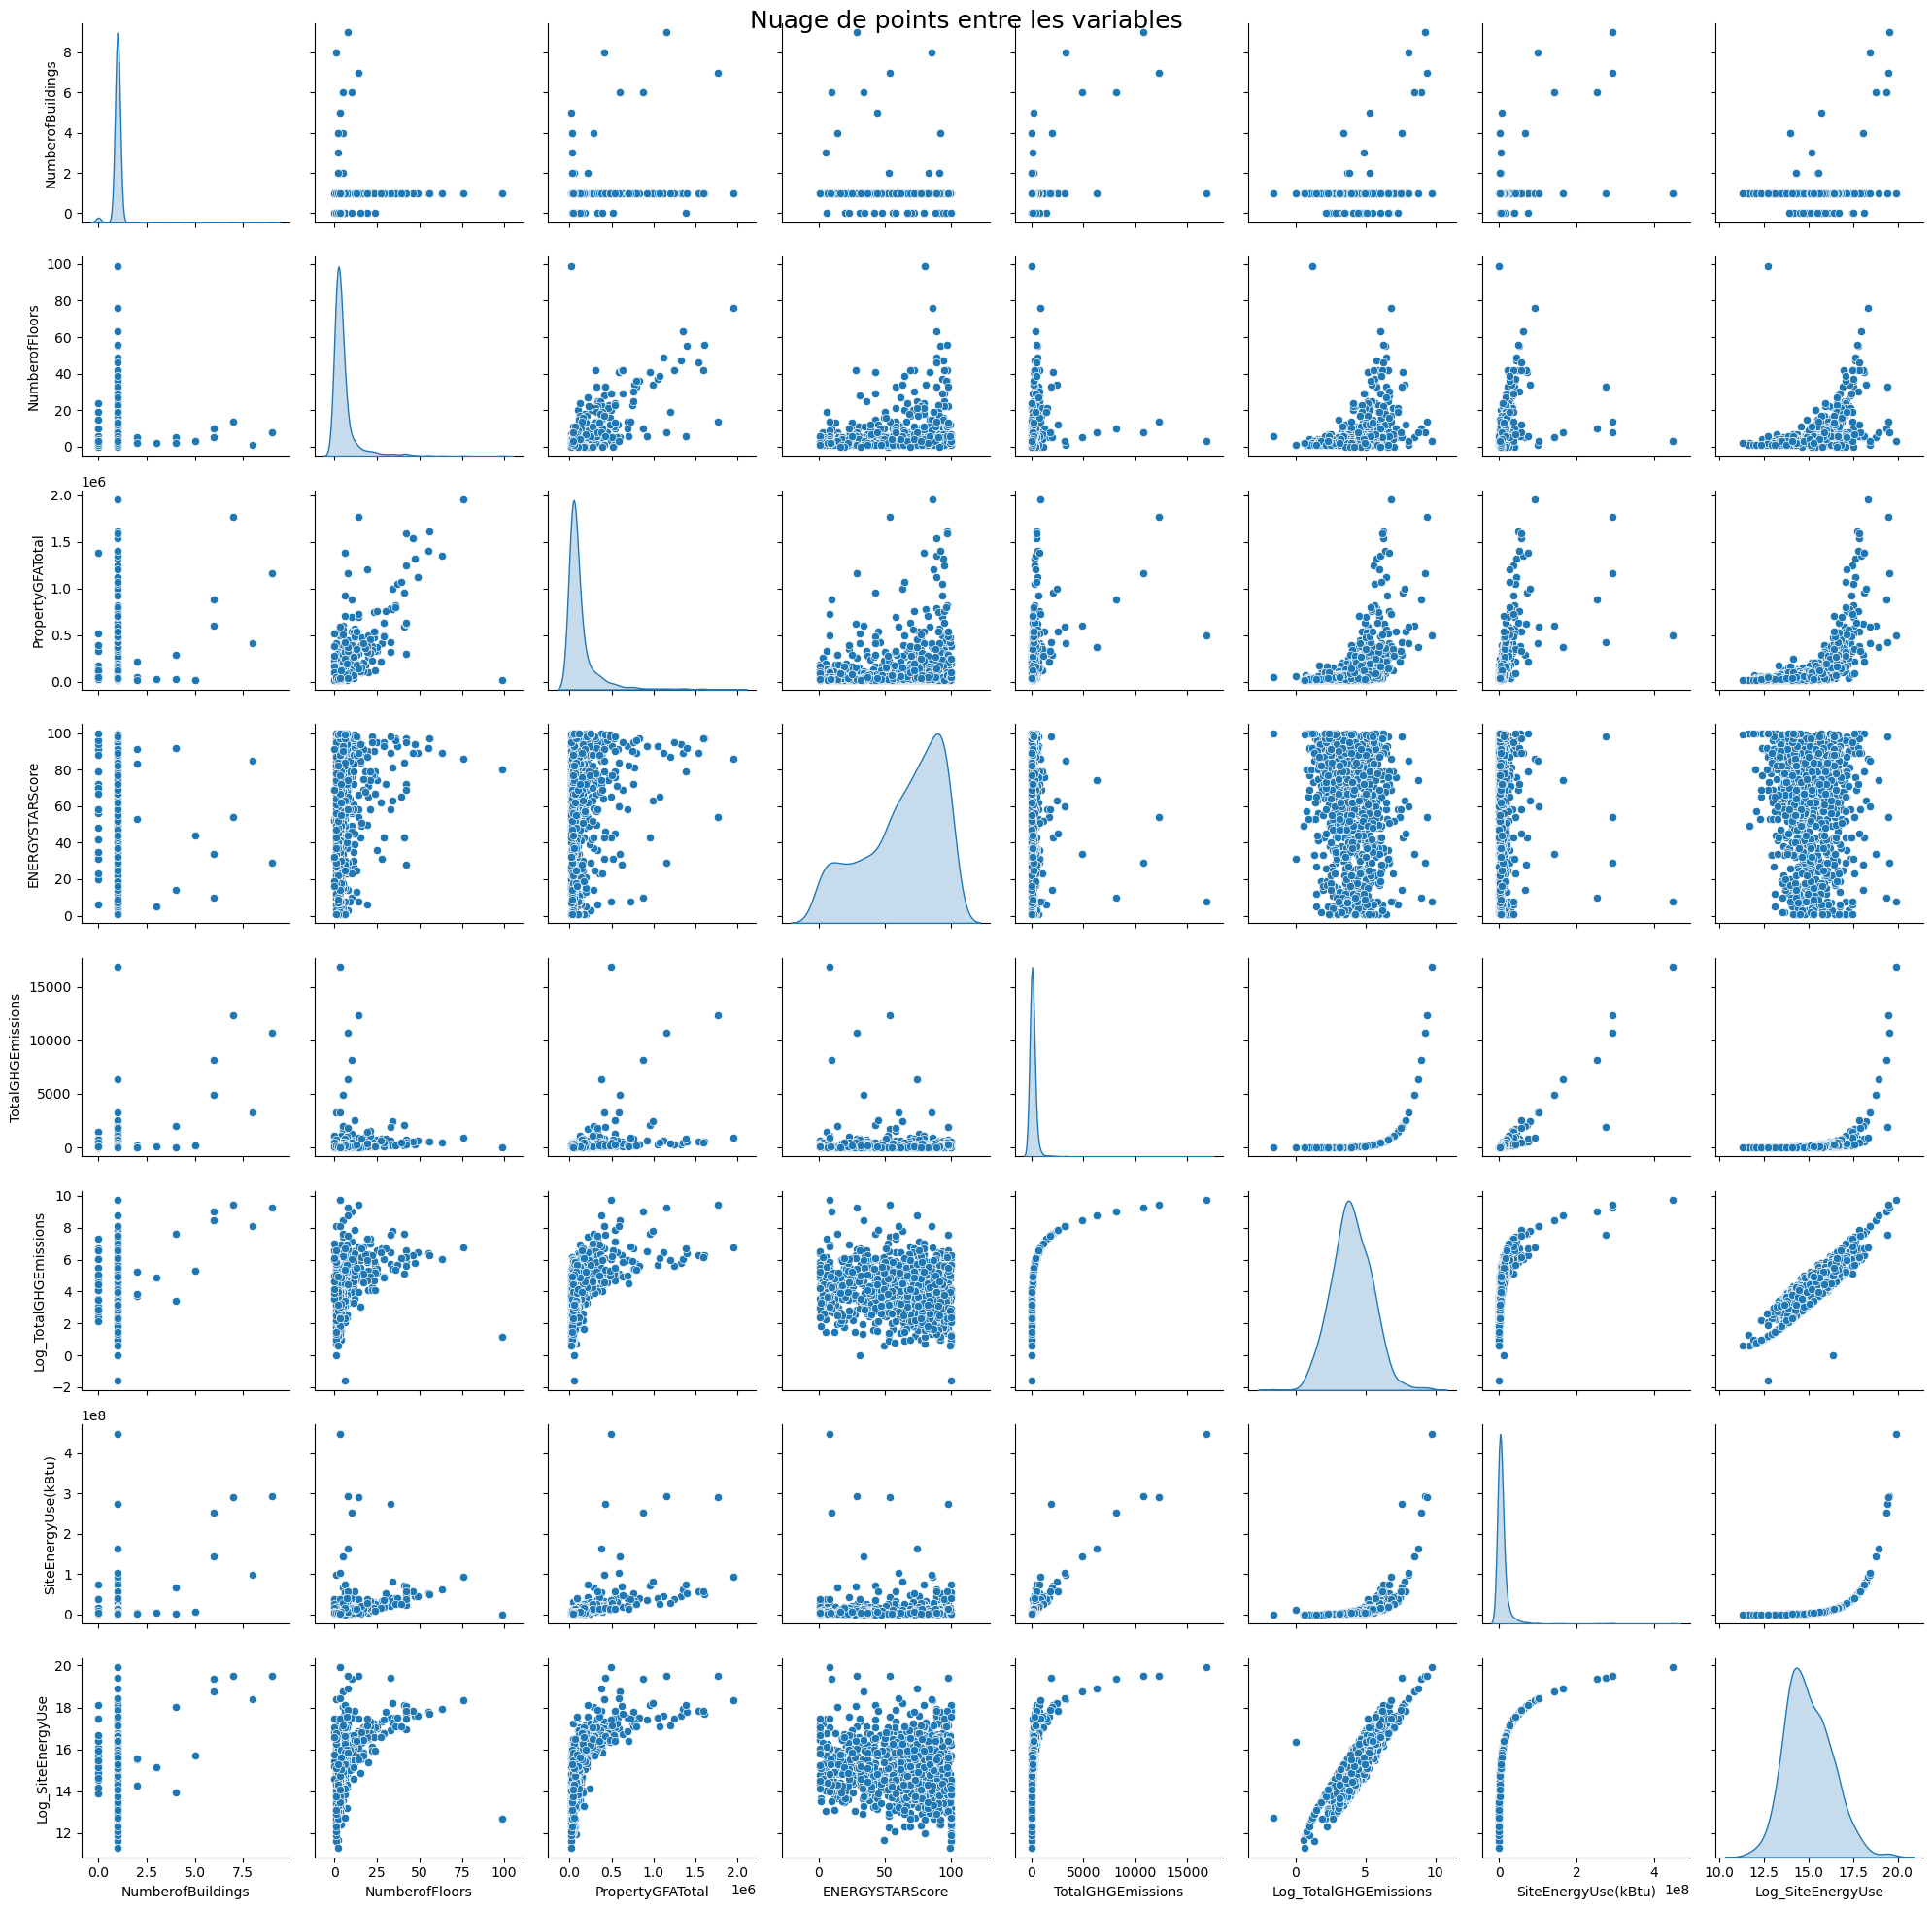

In [63]:
# Nuage de points entre les variables ( analyse bivariée)
sns.pairplot(data21.dropna(), kind="scatter", diag_kind="kde")
plt.suptitle('Nuage de points entre les variables', fontsize=18)  
# Enregistrer l'image de nuage de points 
plt.tight_layout()
plt.savefig('nuage.png')
plt.show()

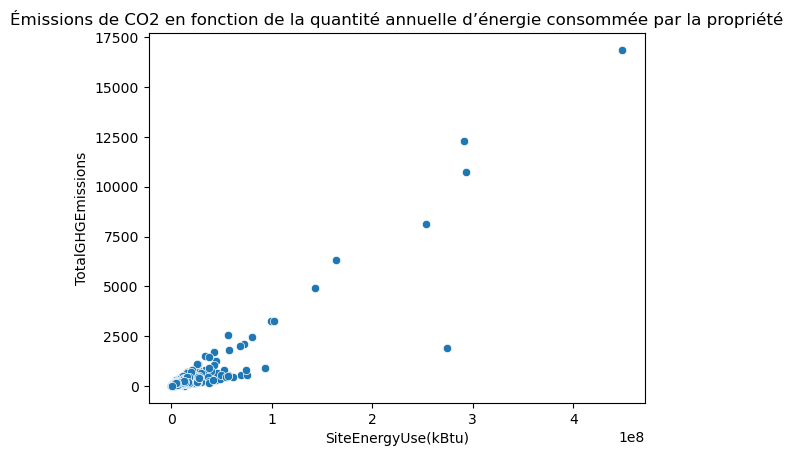

In [64]:
# Scatter plot des émissions de CO2 vs total d'énergie consommé
sns.scatterplot(x='SiteEnergyUse(kBtu)', y='TotalGHGEmissions', data=data21)
plt.title('Émissions de CO2 en fonction de la quantité annuelle d’énergie consommée par la propriété')
plt.savefig('scatterpolt1.png')
plt.show()

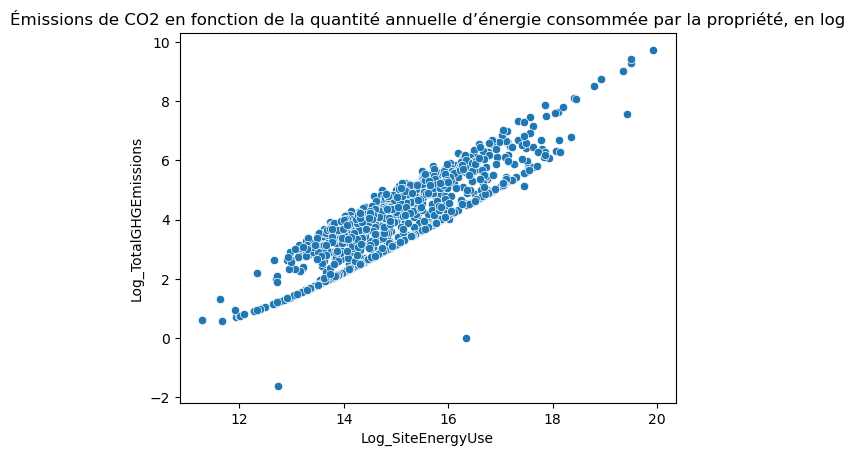

In [65]:
# Scatter plot du log des émissions de CO2 vs le log du total d'énergie consommé
sns.scatterplot(x='Log_SiteEnergyUse', y='Log_TotalGHGEmissions', data=data21)
plt.title('Émissions de CO2 en fonction de la quantité annuelle d’énergie consommée par la propriété, en log')
plt.savefig('scatterpolt2.png')
plt.show()

In [66]:
data21['LargestPropertyUseType']

0                            Hotel
1                            Hotel
2                            Hotel
3                            Hotel
4                            Hotel
                   ...            
3329                        Office
3337                         Hotel
3338    Non-Refrigerated Warehouse
3339                        Office
3347                   K-12 School
Name: LargestPropertyUseType, Length: 995, dtype: object

### Transformation des données : Convertir les variables catégorielles en variables factices/indicatrices.

In [67]:
data21.dtypes

BuildingType               object
Neighborhood               object
NumberofBuildings         float64
NumberofFloors              int64
PropertyGFATotal            int64
LargestPropertyUseType     object
ENERGYSTARScore           float64
TotalGHGEmissions         float64
Log_TotalGHGEmissions     float64
SiteEnergyUse(kBtu)       float64
Log_SiteEnergyUse         float64
dtype: object

In [68]:
# Transformer les variables catégorielles 'BuildingType', 'Neighborhood', 'LargestPropertyUseType' en variables factices ou indicatrices

# Afficher les valeurs uniques des variables catégorielles avant transformation
print("Valeurs uniques de 'BuildingType' avant transformation :", data21['BuildingType'].unique())
print("Valeurs uniques de 'Neighborhood' avant transformation :", data21['Neighborhood'].unique())
print("Valeurs uniques de 'LargestPropertyUseType' avant transformation :", data21['LargestPropertyUseType'].unique())

# Transformer les variables catégorielles en variables factices
data21_dummies = pd.get_dummies(data21, columns=['BuildingType', 'Neighborhood', 'LargestPropertyUseType'], drop_first=True)

# Afficher les premières lignes du DataFrame après transformation
print(data21_dummies.head())

# Afficher les colonnes du DataFrame après transformation
print("Colonnes du DataFrame après transformation :", data21_dummies.columns)

Valeurs uniques de 'BuildingType' avant transformation : ['NonResidential' 'Campus' 'SPS-District K-12' 'Nonresidential COS']
Valeurs uniques de 'Neighborhood' avant transformation : ['DOWNTOWN' 'NORTHEAST' 'GREATER DUWAMISH' 'MAGNOLIA / QUEEN ANNE'
 'BALLARD' 'NORTHWEST' 'LAKE UNION' 'EAST' 'CENTRAL' 'SOUTHWEST'
 'SOUTHEAST' 'NORTH' 'DELRIDGE' 'Delridge' 'Ballard' 'Northwest' 'North'
 'Central']
Valeurs uniques de 'LargestPropertyUseType' avant transformation : ['Hotel' 'Courthouse' 'Office' 'K-12 School' 'Senior Care Community'
 'Medical Office' 'Retail Store' 'Hospital (General Medical & Surgical)'
 'Residence Hall/Dormitory' 'Financial Office'
 'Non-Refrigerated Warehouse' 'Worship Facility' 'Data Center' 'Parking'
 'Supermarket/Grocery Store' 'Distribution Center'
 'Wholesale Club/Supercenter' 'Refrigerated Warehouse' 'Other'
 'Multifamily Housing' 'Bank Branch']
   NumberofBuildings  NumberofFloors  PropertyGFATotal  ENERGYSTARScore  \
0                1.0              12        

In [69]:
# Afficher la dataframe après transformation des variables catégorielles
data21_dummies

,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,TotalGHGEmissions,Log_TotalGHGEmissions,SiteEnergyUse(kBtu),Log_SiteEnergyUse,BuildingType_NonResidential,BuildingType_Nonresidential COS,...,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Parking,LargestPropertyUseType_Refrigerated Warehouse,LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility
0,1.0,12,88434,60.0,249.98,5.525373,7226362.50,15.793246,True,False,...,False,False,False,False,False,False,False,False,False,False
1,1.0,11,103566,61.0,295.86,5.693261,8387933.00,15.942305,True,False,...,False,False,False,False,False,False,False,False,False,False
2,1.0,41,956110,43.0,2089.28,7.645053,72587024.00,18.100297,True,False,...,False,False,False,False,False,False,False,False,False,False
3,1.0,10,61320,56.0,286.43,5.660979,6794584.00,15.731637,True,False,...,False,False,False,False,False,False,False,False,False,False
4,1.0,18,175580,75.0,505.01,6.226556,14172606.00,16.466822,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,1.0,13,536697,98.0,245.16,5.505982,13239050.00,16.398681,False,True,...,True,False,False,False,False,False,False,False,False,False
3337,1.0,4,126823,72.0,131.02,4.882953,6042399.50,15.614312,True,False,...,False,False,False,False,False,False,False,False,False,False
3338,1.0,1,52085,37.0,157.70,5.067016,3605855.50,15.098070,True,False,...,False,False,False,False,False,False,False,False,False,False
3339,1.0,2,24990,9.0,134.80,4.911183,4420650.50,15.301798,True,False,...,True,False,False,False,False,False,False,False,False,False


In [70]:
# Enregistrer mon dataframe modifié dans un fichier csv
data21_dummies.to_csv('DataCleaned.csv', index=False)